## Fire Services Incident Data


### About the data

This dataset provides information similar to what is sent to the Ontario Fire Marshal relating to only fire Incidents to which Toronto Fire responds in more detail than the dataset including all incident types. The Dataset includes only Fire incidents as defined by the Ontario Fire Marshal. For privacy purposes personal information is not provided and exact address have been aggregated to the nearest major or minor intersection. Some incidents have been excluded pursuant to exemptions under Section 8 of Municipal Freedom of Information and Protection of Privacy Act (MFIPPA).[1]

### ANALYSIS TO PREDICT TORONTO FIRE INJURY AND FATALITY

This dataset is from the City of Toronto's Open Data Catalog. It provides information similar to what is sent to the Ontario Fire Marshal relating to all Incidents to which Toronto Fire responds. This dataset includes various field including response time intervals (dispatch, enroute, arrive and clear) and responding units.  For privacy purposes some of the personal information is not provided and for medical incidents some information has been altered. 

Dataset from the City of Toronto Open Data Catalogue at:
https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#e3d443bb-2593-2615-4972-20e24c0ab876

The Fire Services Incident Data is located at:
https://open.toronto.ca/dataset/fire-services-incident-data/

The dataset consists of 6 XML formatted files, one for each year from 2011 to 2016.

To see the column definition for each column. Please refer to XML definition (2011 - 2015) and XML definition (2016) under the data catalogue link

This was the final term project for the machine learning course at Univeristy of Toronto, School of Continuining Studies

#### TERM PROJECT: 3253 MACHINE LEARNING COURSE,  UNIVERSITY OF TORONTO CONTINUING EDUCATION
#### SUBMITTED by: ADNAN LANEWLA, ARJUN VERMA, ASHOK MISTRY, DAVID SIGNORETTI 

## Method declaration

In [1]:
def calc_total_inj_fat(df):
    df_fat_inj = df[['ff_injuries', 'ff_fatalities', 'civilian_fire_injury', 'civilian_fire_fatality']]
    df.drop(['ff_injuries', 'ff_fatalities', 'civilian_fire_injury', 'civilian_fire_fatality'], inplace=True, axis=1)
    ff_inj = df_fat_inj['ff_injuries'].astype(int)
    ff_fat = df_fat_inj['ff_fatalities'].astype(int)
    cv_inj = df_fat_inj['civilian_fire_injury'].astype(int)
    cv_fat = df_fat_inj['civilian_fire_fatality'].astype(int)
    print('ff_injuries')
    print(df_fat_inj['ff_injuries'].value_counts())
    print('ff_fatalities')
    print(df_fat_inj['ff_fatalities'].value_counts())
    print('civilian_fire_injury')
    print(df_fat_inj['civilian_fire_injury'].value_counts())
    print('civilian_fire_fatality')
    print(df_fat_inj['civilian_fire_fatality'].value_counts())
    df['ff_injuries'] = np.where(ff_inj >= 1, 1,0)
    df['ff_fatalities'] = np.where(ff_fat>= 1, 1,0)
    df['civilian_fire_injury'] = np.where(cv_inj >= 1, 1,0)
    df['civilian_fire_fatality'] = np.where(cv_fat >= 1, 1,0)
    ff_inj = np.where(ff_inj >= 1, 1,0)
    ff_fat = np.where(ff_fat>= 1, 1,0)
    cv_inj = np.where(cv_inj >= 1, 1,0)
    cv_fat = np.where(cv_fat >= 1, 1,0)
    total_inj_fat = np.empty(720370,)
    for index, val in enumerate(ff_inj):
        total_inj_fat[index] = np.where((ff_inj[index] + ff_fat[index] + cv_inj[index] + cv_fat[index]) >=1, 1,0)
    df['total_inj_fatality'] = total_inj_fat
    print('ff_injuries')
    print(df['ff_injuries'].value_counts())
    print('ff_fatalities')
    print(df['ff_fatalities'].value_counts())
    print('civilian_fire_injury')
    print(df['civilian_fire_injury'].value_counts())
    print('civilian_fire_fatality')
    print(df['civilian_fire_fatality'].value_counts())
    print('total_inj_fatality')
    print(df['total_inj_fatality'].value_counts())
    return df

In [2]:
def fill_na(df, label):
    if(df[label].isna().sum()/len(df[label]) *100 > 0.0):
        _v = df[label].mean()
        print(label + ': ' + str(_v))
        df[label].fillna(value=_v, inplace=True)

In [3]:
def get_injuries(df):
    df = df[(df['total_inj_fatality'] == 1)]
    return df

In [4]:
def get_noinjuries(df):
    df = df[(df['total_inj_fatality'] == 0)]
    return df

In [5]:
def label_vs_injuries(df, label, title_0, title_1):
    df_copy = df.copy()
    if(df_copy[label].isna().sum()/len(df_copy[label]) *100 > 0.0):
        _v = df_copy[label].mean()
        print(_v)
        df_copy[label].fillna(value=_v, inplace=True)
    df_copy_0 = get_noinjuries(df_copy)
    df_copy_1 = get_injuries(df_copy)
    plotbar_0(label,title_0, df_copy_0)
    plotbar_1(label,title_1, df_copy_1)

In [6]:
def label_vs_injuries_and_fatalities(df, label, title_0, title_1):
    df_copy = df.copy()
    if(df_copy[label].isna().sum()/len(df_copy[label]) *100 > 0.0):
        _v = df_copy[label].mean()
        print(_v)
        df_copy[label].fillna(value=_v, inplace=True)
    df_copy_0 = get_noinjuries(df_copy)
    df_copy_1 = get_injuries(df_copy)
    plotbar_0_3(label,title_0, df_copy_0)
    plotbar_1_3(label,title_1, df_copy_1)

### Plotting Methods

In [7]:
def plotbar_0(label, ax1, ax2, title, df):
    feature = df.groupby(label)
    feature.size().plot(kind='bar', color='blue', legend=True, label='No injuries', ax=axes[ax1,ax2], title=title)

In [8]:
def plotbar_1(label, ax1, ax2, title, df):
    feature = df.groupby(label)
    feature.size().plot(kind='bar', color='Orange', legend=True, label='Injuries', ax=axes[ax1,ax2], title=title)

In [9]:
def plotbar_0_3(label, title, df):
    feature = df.groupby(label)
    feature.size().plot(kind='bar', color='blue', legend=True, label=label, title=title, figsize=(16,8))
    save_fig(title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [10]:
def plotbar_1_3(label, title, df):
    feature = df.groupby(label)
    feature.size().plot(kind='bar', color='Orange', legend=True, label=label, title=title, figsize=(16,8))
    save_fig(title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [11]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./images/", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Gathering and Preparation

### Extract CSV from XML 

In [12]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display
import glob
pd.set_option('display.max_columns',200)

import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
%pylab inline

from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [13]:
def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
        all_records.append(record)
    df = pd.DataFrame(all_records)
    return df

In [14]:
# import the xml files into one dataframe
_d = pd.DataFrame()

filenames = sorted(glob.glob('./dataset/xml/201*.xml'))
filenames = filenames[0:6]

for f in filenames:
    print(f)
    xml_data = open(f).read()
    _x = xml2df(xml_data)
    _d = _d.append(_x)

./dataset/xml\2011.xml
./dataset/xml\2012.xml
./dataset/xml\2013.xml
./dataset/xml\2014.xml
./dataset/xml\2015.xml
./dataset/xml\2016.xml


In [15]:
# Review the shape of the Dataframe
_d.shape

(720370, 103)

### Creating Main CSV
- This csv file has all the columns 

In [5]:
_d.to_csv('./dataset/data/fire.csv')

In [6]:
_d = pd.read_csv('./dataset/data/fire.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (39,46,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
_d.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720370 entries, 0 to 720369
Columns: 104 entries, Unnamed: 0 to WATER
dtypes: float64(55), int64(22), object(27)
memory usage: 1.4 GB


In [8]:
_d.head()

,Unnamed: 0,AGENT_APP_HOUR,AGENT_APP_MIN,AGENT_APP_SEC,AGE_OF_STRUCTURE,AID_TO_FROM_OTHER_DEPTS,ALARM_TO_FD,AREA_OF_ORIGIN,ARRIVE_DATE,BLD_HEIGHT,BLD_STATUS,CANUTEC,CIVILIAN_FIRE_FATALITY,CIVILIAN_FIRE_INJURY,CIV_EVACUATION,CIV_EVACUATION_REASON_1,CIV_EVACUATION_REASON_2,CIV_FIRE_CONTROL,COMPLEX,CONTROL_DATE,CONTROL_HOUR,CONTROL_MIN,CONTROL_SEC,CROSS_STREET,DISPATCH_DATE,DISPATCH_HOUR,DISPATCH_MIN,DISPATCH_SEC,EMS,ESA,EST_KM,EST_LOSS,EST_NUM_PERSONS_DISPLACED,EST_VALUE_AT_RISK,EVENT_ALARM_LEVEL,EVENT_TYPE,EVENT_TYPE_CD,EXTENT_FIRE,EXTENT_SMOKE,FD_STATION,FF_FATALITIES,FF_INJURIES,FIRE_ALARM_SYSTEM_IMPACT,FIRE_ALARM_SYSTEM_OPERATION,FIRE_ALARM_SYSTEM_PRESENCE,FIRE_CONTROL,FIRE_DEPT_INCIDENT,FSA,FUEL_OF_IGNITION_SOURCE,GAS,HYDRO,IGNITION_SOURCE,INCIDENT_DATE,INCIDENT_NUMBER,INITIAL_CALL_HOUR,INITIAL_CALL_MIN,INITIAL_CALL_SEC,INITIAL_DETECTION,INITIAL_UNIT_PERSONNEL,INSURANCE_ESTIMATE,LEVEL_OF_ORIGIN,MAIN_STREET,MOE,MOL,MUNICIPAL_BUILDING_OFFICE,MUNICIPAL_HEALTH_OFFICE,MUNICIPAL_POLICE,OBJECT_OR_MATERIAL_FIRST_IGNITED,OCC_STATUS,OCC_TYPE,OFM_INVESTIGATIONS_CONTACTED,ONSCENE_HOUR,ONSCENE_MIN,ONSCENE_SEC,OPP,OTHER,PHYSICAL_CONDITION_1,PHYSICAL_CONDITION_2,PHYSICAL_CONDITION_3,POSSIBLE_BUSINESS_IMPACT,POSSIBLE_CAUSE,PROPERTY,RESCUED_ADULTS,RESCUED_CHILDREN,RESCUED_SENIORS,RESCUES,RESPONDING_UNITS,RESPONSE_TYPE,RespondingUnits,SMOKE_ALARM_FAILURE_TO_OPERATE,SMOKE_ALARM_IMPACT_ON_EVAC,SMOKE_ALARM_IMPACT_ON_NUM_EVAC,SMOKE_ALARM_ON_ALL_FLOORS,SMOKE_ALARM_OTHER_FLOOR_PRESENCE,SMOKE_ALARM_PRESENCE_AND_OPERATION_MAIN_FLOOR,SMOKE_ALARM_TYPE,SPRINKLER_SYSTEM_ACTIVATION,SPRINKLER_SYSTEM_PRESENCE,STATUS_ON_ARRIVAL,TOTAL_NUM_PERSONNEL,TSSA,VEH_FUEL,VEH_PURPOSE,WATER
0,0,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:10:02,0,NaN,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1,0,0,NaN,NaN,Medical,MEB,NaN,NaN,F11000010000,0,0,NaN,NaN,NaN,NaN,NaN,M6N,NaN,,,NaN,01/01/2011,F11000010,0,3,43,NaN,4,NaN,NaN,NaN,,,,,,NaN,NaN,NaN,0,0.0,10.0,2.0,,,NaN,NaN,NaN,NaN,NaN,301,0,0,0,0,1.0,89,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:09:02,0,NaN,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1,0,0,NaN,NaN,Carbon Monoxide - Non Medical,CONM,NaN,NaN,F11000011000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,01/01/2011,F11000011,0,3,55,NaN,4,NaN,NaN,MOUNT PLEASANT RD,,,,,,NaN,NaN,NaN,0,0.0,9.0,2.0,,,NaN,NaN,NaN,NaN,NaN,301,0,0,0,0,1.0,38,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,4,3.0,NaN,2011-01-01 00:09:34,0,NaN,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1,0,0,NaN,NaN,Medical,MEPI,NaN,NaN,F11000012000,0,0,NaN,NaN,NaN,NaN,NaN,M4M,NaN,,,NaN,01/01/2011,F11000012,0,5,3,NaN,4,NaN,NaN,NaN,,,,,,NaN,NaN,NaN,0,0.0,9.0,34.0,,,NaN,NaN,NaN,NaN,NaN,302,0,0,0,0,1.0,89,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,4,1.0,NaN,2011-01-01 00:10:46,0,NaN,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2,0,0,NaN,NaN,Fire - Grass/Rubbish,FIG,NaN,NaN,F11000013000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,01/01/2011,F11000013,0,4,46,NaN,4,NaN,NaN,DUFFERIN ST,,,,,,NaN,NaN,NaN,0,0.0,10.0,46.0,,,NaN,NaN,NaN,NaN,NaN,861,0,0,0,0,1.0,3,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,1,5.0,NaN,2011-01-01 00:11:03,0,NaN,,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1,0,0,NaN,NaN,Alarm Highrise Residential,FAHR,NaN,NaN,F11000014000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,01/01/2011,F11000014,0,6,7,NaN,4,NaN,NaN,SAN ROMANOWAY,,,,,,NaN,NaN,NaN,0,0.0,11.0,3.0,,,NaN,NaN,NaN,NaN,NaN,323,0,0,0,0,4.0,33,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,,NaN,NaN,NaN


### Cleanup
- Remove any whitespaces from the names
- set all the name to lower case
- delete all columns which has nan more than 90%

In [9]:
_d.columns = _d.columns.str.replace(' ', '')
_d.columns = _d.columns.str.lower()

In [10]:
_d.initial_call_hour = _d.initial_call_hour.astype(dtype=str)
_d.initial_call_min = _d.initial_call_min.astype(dtype=str)
_d.initial_call_sec = _d.initial_call_sec.astype(dtype=str)

In [11]:
_d['incident_date_time'] = pd.to_datetime(_d['incident_date'] + ' ' + _d['initial_call_hour']\
                                    +':'+_d['initial_call_min']+':'+_d['initial_call_sec'])

In [12]:
_d[['incident_date','initial_call_hour','initial_call_min',
 'initial_call_sec','incident_date_time']].dtypes

incident_date                 object
initial_call_hour             object
initial_call_min              object
initial_call_sec              object
incident_date_time    datetime64[ns]
dtype: object

In [13]:
# Deterime the pecentage of nan per column
_d.isna().sum()/len(_d)*100

unnamed:0                                          0.000000
agent_app_hour                                    98.288380
agent_app_min                                     98.288380
agent_app_sec                                     98.288380
age_of_structure                                  98.781043
aid_to_from_other_depts                            0.000000
alarm_to_fd                                        0.000139
area_of_origin                                    98.288380
arrive_date                                        2.332413
bld_height                                         0.000000
bld_status                                        98.781043
canutec                                            0.000000
civilian_fire_fatality                             0.000000
civilian_fire_injury                               0.000000
civ_evacuation                                    98.288518
civ_evacuation_reason_1                           98.288518
civ_evacuation_reason_2                 

- Remove columns that are more than 90% null

In [14]:
# remove columns that have more than 90% nan or 105683 nan rows
_d = _d.loc[:, _d.isnull().sum() < 0.9*_d.shape[0]]

In [16]:
df = _d.copy()

In [18]:
# Delete orignal Dataframe _d
del _d

In [19]:
# Fill any NAN data withthe average of the column
for key, value in df.iteritems():
    if np.issubdtype(df[key].dtype, np.number) == True:
        _v = df[key].mean()
        df[key].fillna(value=_v)

In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720370 entries, 0 to 720369
Data columns (total 58 columns):
unnamed:0                         720370 non-null int64
aid_to_from_other_depts           720370 non-null int64
alarm_to_fd                       720369 non-null float64
arrive_date                       703568 non-null object
bld_height                        720370 non-null int64
canutec                           720370 non-null object
civilian_fire_fatality            720370 non-null int64
civilian_fire_injury              720370 non-null int64
control_date                      241537 non-null object
cross_street                      330021 non-null object
dispatch_date                     719679 non-null object
dispatch_hour                     720193 non-null float64
dispatch_min                      720193 non-null float64
dispatch_sec                      720193 non-null float64
ems                               720370 non-null object
esa                               7

In [21]:
df.head(5)

,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,civilian_fire_fatality,civilian_fire_injury,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,ff_fatalities,ff_injuries,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time
0,0,4,3.0,2011-01-01 00:10:02,0,,0,0,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1,0,0,NaN,Medical,MEB,F11000010000,0,0,NaN,M6N,,,01/01/2011,F11000010,0,3,43,4,NaN,,,,,,0,0.0,10.0,2.0,,,301,0,0,0,0,1.0,89,0,4,,2011-01-01 00:03:43
1,1,4,1.0,2011-01-01 00:09:02,0,,0,0,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,0,0,NaN,NaN,,,01/01/2011,F11000011,0,3,55,4,MOUNT PLEASANT RD,,,,,,0,0.0,9.0,2.0,,,301,0,0,0,0,1.0,38,0,4,,2011-01-01 00:03:55
2,2,4,3.0,2011-01-01 00:09:34,0,,0,0,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1,0,0,NaN,Medical,MEPI,F11000012000,0,0,NaN,M4M,,,01/01/2011,F11000012,0,5,3,4,NaN,,,,,,0,0.0,9.0,34.0,,,302,0,0,0,0,1.0,89,0,4,,2011-01-01 00:05:03
3,3,4,1.0,2011-01-01 00:10:46,0,,0,0,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,0,0,NaN,NaN,,,01/01/2011,F11000013,0,4,46,4,DUFFERIN ST,,,,,,0,0.0,10.0,46.0,,,861,0,0,0,0,1.0,3,0,4,,2011-01-01 00:04:46
4,4,1,5.0,2011-01-01 00:11:03,0,,0,0,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,0,0,NaN,NaN,,,01/01/2011,F11000014,0,6,7,4,SAN ROMANOWAY,,,,,,0,0.0,11.0,3.0,,,323,0,0,0,0,4.0,33,0,14,,2011-01-01 00:06:07


In [23]:
df.to_csv('./dataset/data/TFSDataSet.csv')

## Data Exploration and Analysis

- Our goal is to explore the data, and see if any data has a co-relation with total fatality

### Adding a feature column (total_inj_fatality) combining Civilian and Firefighter Injuries and Fatalities. 

In [26]:
Pure_df = pd.read_csv('./dataset/data/TFSDataSet.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
Pure_df.shape

(720370, 59)

In [28]:
df_total = calc_total_inj_fat(Pure_df)

ff_injuries
0    720157
1       175
2        24
3        10
4         4
Name: ff_injuries, dtype: int64
ff_fatalities
0    720370
Name: ff_fatalities, dtype: int64
civilian_fire_injury
0     719717
1        519
2         82
3         31
4         13
5          3
6          2
12         1
8          1
7          1
Name: civilian_fire_injury, dtype: int64
civilian_fire_fatality
0    720319
1        43
2         6
3         2
Name: civilian_fire_fatality, dtype: int64
ff_injuries
0    720157
1       213
Name: ff_injuries, dtype: int64
ff_fatalities
0    720370
Name: ff_fatalities, dtype: int64
civilian_fire_injury
0    719717
1       653
Name: civilian_fire_injury, dtype: int64
civilian_fire_fatality
0    720319
1        51
Name: civilian_fire_fatality, dtype: int64
total_inj_fatality
0.0    719479
1.0       891
Name: total_inj_fatality, dtype: int64


In [29]:
df_total.to_csv('./dataset/data/TFSDataSetWithTotalFatality.csv')

- Reading the .csv file which has a Total fatality column. Total fatality column includes all the injuries and fatalities

In [2]:
Pure_df = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = Pure_df.copy()

df.head()

,Unnamed: 0,Unnamed: 0.1,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality
0,0,0,0,4,3.0,2011-01-01 00:10:02,0,,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,,,01/01/2011,F11000010,0,3,43,4,NaN,,,,,,0,0.0,10.0,2.0,,,301,0,0,0,0,1.0,89,0,4,,2011-01-01 00:03:43,0,0,0,0,0.0
1,1,1,1,4,1.0,2011-01-01 00:09:02,0,,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,,,01/01/2011,F11000011,0,3,55,4,MOUNT PLEASANT RD,,,,,,0,0.0,9.0,2.0,,,301,0,0,0,0,1.0,38,0,4,,2011-01-01 00:03:55,0,0,0,0,0.0
2,2,2,2,4,3.0,2011-01-01 00:09:34,0,,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,,,01/01/2011,F11000012,0,5,3,4,NaN,,,,,,0,0.0,9.0,34.0,,,302,0,0,0,0,1.0,89,0,4,,2011-01-01 00:05:03,0,0,0,0,0.0
3,3,3,3,4,1.0,2011-01-01 00:10:46,0,,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,,,01/01/2011,F11000013,0,4,46,4,DUFFERIN ST,,,,,,0,0.0,10.0,46.0,,,861,0,0,0,0,1.0,3,0,4,,2011-01-01 00:04:46,0,0,0,0,0.0
4,4,4,4,1,5.0,2011-01-01 00:11:03,0,,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,,,01/01/2011,F11000014,0,6,7,4,SAN ROMANOWAY,,,,,,0,0.0,11.0,3.0,,,323,0,0,0,0,4.0,33,0,14,,2011-01-01 00:06:07,0,0,0,0,0.0


### Injuries vs Year

- Separating the data in different years
- Goal here is to see if any particular year resulted in higher than average number of injuries/fatalities

In [48]:
data_allyear = df.copy()

In [49]:
data_allyear['year'] = df['incident_date_time'].map(lambda x: x[0:4])
data_allyear = data_allyear[['year', 'total_inj_fatality']]

Saving figure All years vs no injuries


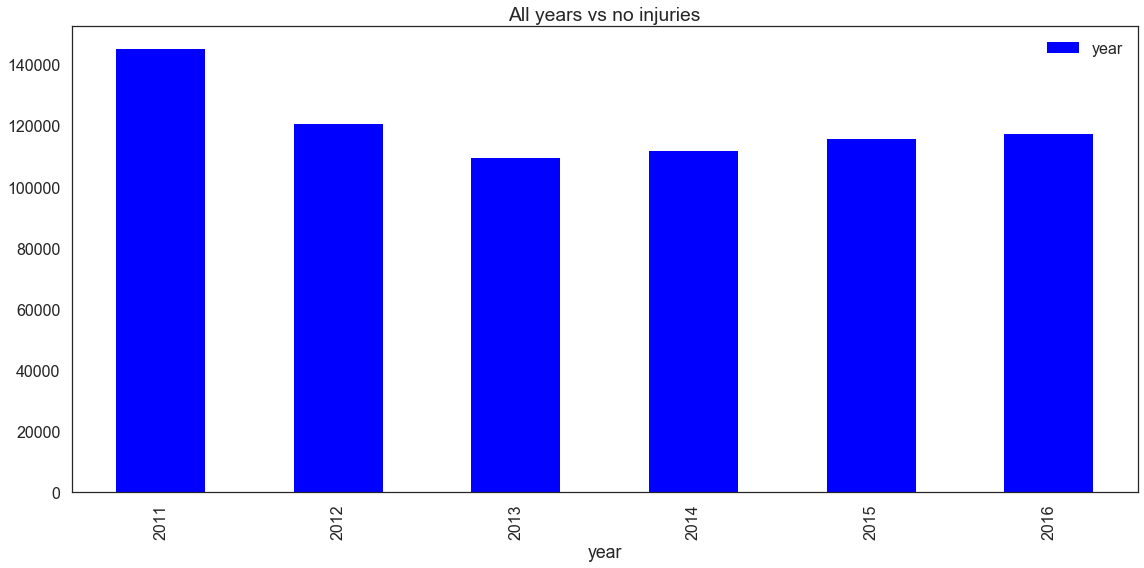

Saving figure All years vs injuries


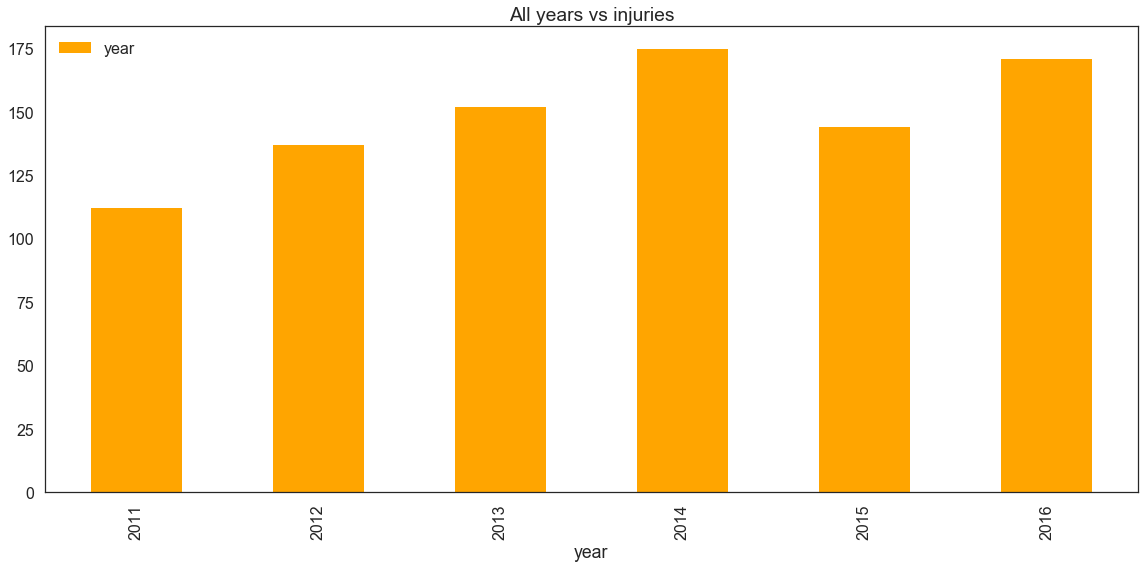

In [50]:
data_allyear_0 = get_noinjuries(data_allyear)
data_allyear_1 = get_injuries(data_allyear)

plotbar_0_3('year','All years vs no injuries', data_allyear_0)
plotbar_1_3('year','All years vs injuries', data_allyear_1)

After looking at the plots it seems like there is no correlation with what year is it to number of injuries / fatalities

- Since there is no correlation with year, we can ignore the year in the incident data

### Injuries vs Month

- Combining the months for all the years.
- We are trying to see if there is any corelation with injuries / fatalities with a particular month in a specific year

In [66]:
data2011 = df[(df['incident_date_time'] >= '2011-01-01') & (df['incident_date_time'] <= '2012-01-01')]
data2012 = df[(df['incident_date_time'] >= '2012-01-01') & (df['incident_date_time'] <= '2013-01-01')]
data2013 = df[(df['incident_date_time'] >= '2013-01-01') & (df['incident_date_time'] <= '2014-01-01')]
data2014 = df[(df['incident_date_time'] >= '2014-01-01') & (df['incident_date_time'] <= '2015-01-01')]
data2015 = df[(df['incident_date_time'] >= '2015-01-01') & (df['incident_date_time'] <= '2016-01-01')]
data2016 = df[(df['incident_date_time'] >= '2016-01-01') & (df['incident_date_time'] <= '2017-01-01')]

In [67]:
def get_month(dataframe):
    dataframe['month'] = dataframe['incident_date_time'].map(lambda x: x[5:7])
    dataframe = dataframe[['month', 'total_inj_fatality']]
    return dataframe

In [68]:
data2011 = get_month(data2011)
data2012 = get_month(data2012)
data2013 = get_month(data2013)
data2014 = get_month(data2014)
data2015 = get_month(data2015)
data2016 = get_month(data2016)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
data2011_0 = data2011[(data2011['total_inj_fatality'] == 0)]
data2011_1 = data2011[(data2011['total_inj_fatality'] == 1)]

data2012_0 = data2012[(data2012['total_inj_fatality'] == 0)]
data2012_1 = data2012[(data2012['total_inj_fatality'] == 1)]

data2013_0 = data2013[(data2013['total_inj_fatality'] == 0)]
data2013_1 = data2013[(data2013['total_inj_fatality'] == 1)]

data2014_0 = data2014[(data2014['total_inj_fatality'] == 0)]
data2014_1 = data2014[(data2014['total_inj_fatality'] == 1)]

data2015_0 = data2015[(data2015['total_inj_fatality'] == 0)]
data2015_1 = data2015[(data2015['total_inj_fatality'] == 1)]

data2016_0 = data2016[(data2016['total_inj_fatality'] == 0)]
data2016_1 = data2016[(data2016['total_inj_fatality'] == 1)]

Saving figure month vs injuries


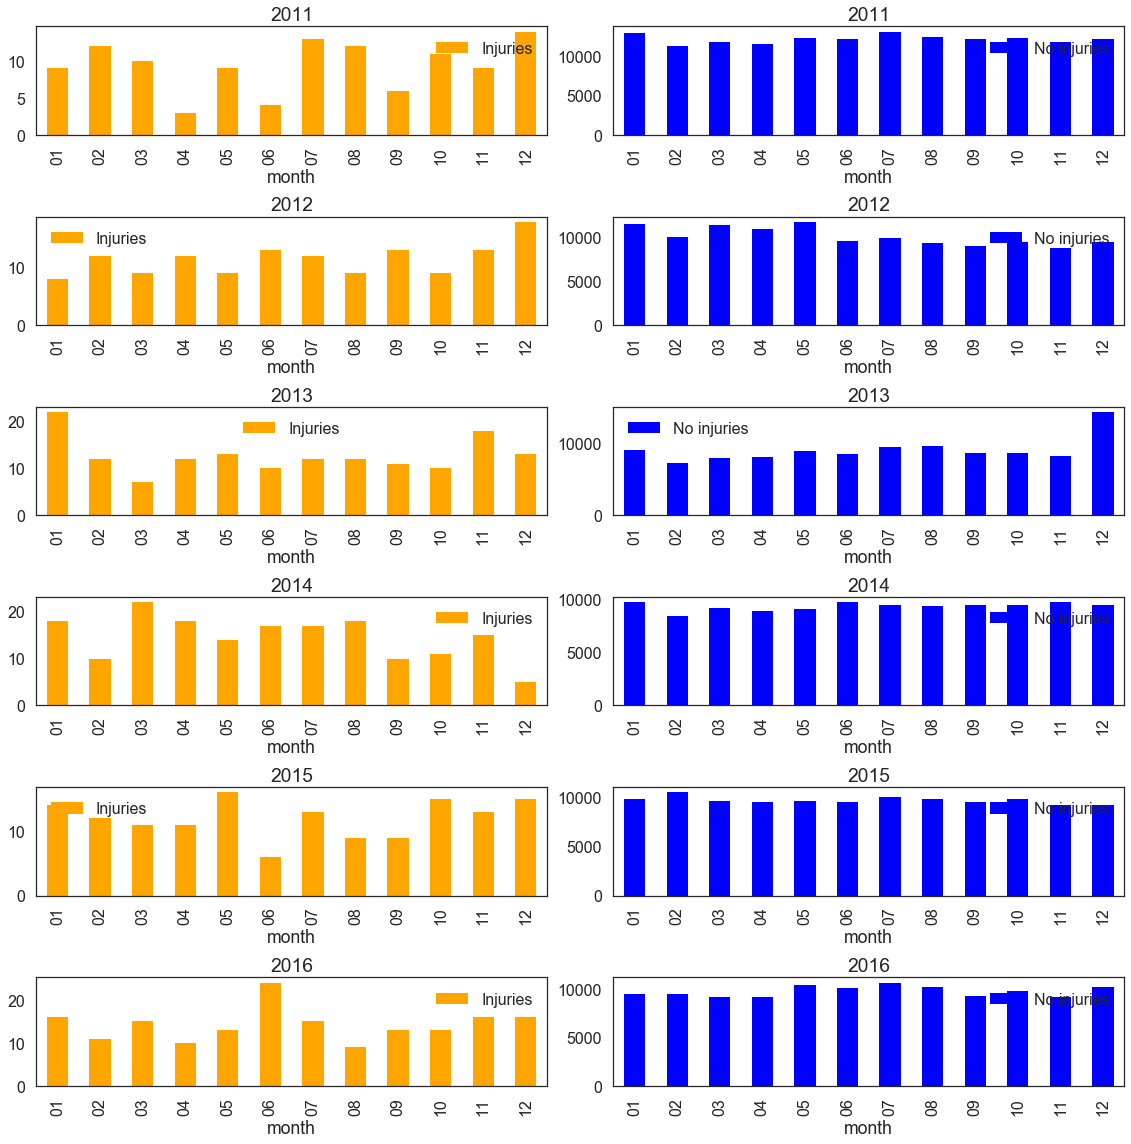

In [73]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16,16))
plt.subplots_adjust(top=2)

plotbar_1('month', 0,0, 2011, data2011_1)
plotbar_0('month', 0,1, 2011, data2011_0)

plotbar_1('month', 1,0, 2012, data2012_1)
plotbar_0('month', 1,1, 2012, data2012_0)

plotbar_1('month', 2,0, 2013, data2013_1)
plotbar_0('month', 2,1, 2013, data2013_0)

plotbar_1('month', 3,0, 2014, data2014_1)
plotbar_0('month', 3,1, 2014, data2014_0)

plotbar_1('month', 4,0, 2015, data2015_1)
plotbar_0('month', 4,1, 2015, data2015_0)

plotbar_1('month', 5,0, 2016, data2016_1)
plotbar_0('month', 5,1, 2016, data2016_0)

save_fig('month vs injuries')

Looking at the month for every year from incident_data column. It doesn't seem like there is any correlation with injuries/fatalities with what month it is in the year.

- We can ignore what month it is when building our model

### Time-to-reach  vs injuries

Using the initial call min and onscene min feature we calculated min to reach feature.
- Before we calculate this new feature we have to make sure there is no nan in the column
- if there is we have to fill it with the mean

Ploting this feature with repect to injuries/fatalities and no injuries / fatalities

In [29]:
df_tt_min = df.copy()

In [30]:
df_tt_min['onscene_min'].isna().sum()/len(df_tt_min['onscene_min'])*100

2.1337645931951634

In [31]:
df_tt_min['total_min'] = 0

In [32]:
df_tt_min.head(10)

,Unnamed: 0,Unnamed: 0.1,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,total_min
0,0,0,0,4,3.0,2011-01-01 00:10:02,0,,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,,,01/01/2011,F11000010,0,3,43,4,NaN,,,,,,0,0.0,10.0,2.0,,,301,0,0,0,0,1.0,89,0,4,,2011-01-01 00:03:43,0,0,0,0,0.0,0
1,1,1,1,4,1.0,2011-01-01 00:09:02,0,,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,,,01/01/2011,F11000011,0,3,55,4,MOUNT PLEASANT RD,,,,,,0,0.0,9.0,2.0,,,301,0,0,0,0,1.0,38,0,4,,2011-01-01 00:03:55,0,0,0,0,0.0,0
2,2,2,2,4,3.0,2011-01-01 00:09:34,0,,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,,,01/01/2011,F11000012,0,5,3,4,NaN,,,,,,0,0.0,9.0,34.0,,,302,0,0,0,0,1.0,89,0,4,,2011-01-01 00:05:03,0,0,0,0,0.0,0
3,3,3,3,4,1.0,2011-01-01 00:10:46,0,,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,,,01/01/2011,F11000013,0,4,46,4,DUFFERIN ST,,,,,,0,0.0,10.0,46.0,,,861,0,0,0,0,1.0,3,0,4,,2011-01-01 00:04:46,0,0,0,0,0.0,0
4,4,4,4,1,5.0,2011-01-01 00:11:03,0,,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,,,01/01/2011,F11000014,0,6,7,4,SAN ROMANOWAY,,,,,,0,0.0,11.0,3.0,,,323,0,0,0,0,4.0,33,0,14,,2011-01-01 00:06:07,0,0,0,0,0.0,0
5,5,5,5,4,1.0,2011-01-01 00:13:46,0,,NaN,WEST DON RIVER TRL,2011-01-01 00:07:23,0.0,7.0,23.0,,,3,0,0,NaN,Fire - Highrise Residential,FIHR,F11000015000,NaN,NaN,,,01/01/2011,F11000015,0,6,24,4,THORNCLIFFE PARK DR,,,,,,0,0.0,13.0,46.0,,,323,0,0,0,0,5.0,34,0,17,,2011-01-01 00:06:24,0,0,0,0,0.0,0
6,6,6,6,4,1.0,2011-01-01 00:12:54,0,,01/01/11,LN W PERTH N RANDOLPH,2011-01-01 00:07:28,0.0,7.0,28.0,,,2,1000,0,NaN,Fire - Commercial/Industrial,FICI,F11000016000,NaN,NaN,,,01/01/2011,F11000016,0,6,48,4,ERNEST AVE,,,,,,0,0.0,12.0,54.0,,,836,0,0,0,0,18.0,1,0,58,,2011-01-01 00:06:48,0,0,0,0,0.0,0
7,7,7,7,4,3.0,2011-01-01 00:12:43,0,,NaN,NaN,2011-01-01 00:08:51,0.0,8.0,51.0,,,2,0,0,NaN,Medical,MEU,F11000017000,NaN,M4J,,,01/01/2011,F11000017,0,8,26,4,NaN,,,,,,0,0.0,12.0,43.0,,,152,0,0,0,0,1.0,89,0,4,,2011-01-01 00:08:26,0,0,0,0,0.0,0
8,8,8,8,4,3.0,2011-01-01 00:15:44,0,,NaN,NaN,2011-01-01 00:09:31,0.0,9.0,31.0,,,2,0,0,NaN,Medical,MECR,F11000018000,NaN,M6K,,,01/01/2011,F11000018,0,8,56,4,NaN,,,,,,0,0.0,15.0,44.0,,,896,0,0,0,0,1.0,89,0,4,,2011-01-01 00:08:56,0,0,0,0,0.0,0
9,9,9,9,4,4.0,2011-01-01 00:14:28,0,,NaN,BARRINGTON AVE,2011-01-01 00:10:10,0.0,10.0,10.0,,,1,0,0,NaN,Fire - Residential,FIR,F11000019000,NaN,NaN,,,01/01/2011,F11000019,0,9,33,4,SECORD AVE,,,,,,0,0.0,14.0,28.0,,,323,0,0,0,0,5.0,34,0,17,,2011-01-01 00:09:33,0,0,0,0,0.0,0


In [33]:
df.tail(10)

,Unnamed: 0,Unnamed: 0.1,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality
720360,720360,720360,117416,4,3.0,2016-12-31 23:37:06,0,,01/01/00,NaN,2016-12-31 23:34:39,23.0,34.0,39.0,,,1,0,0,0.0,Medical,Medical,0,F16122087000,M5R,,,31/12/2016,F16122087,23,34,26,4,NaN,,,,,,0,23.0,37.0,6.0,,,144,0,0,0,0,1.0,89,0,4,,2016-12-31 23:34:26,0,0,0,0,0.0
720361,720361,720361,117417,4,3.0,2016-12-31 23:53:02,0,,01/01/00,NaN,2016-12-31 23:41:27,23.0,41.0,27.0,,,15,0,0,0.0,Vehicle - Personal Injury Highway,VEPIH,0,F16122088000,NaN,,,31/12/2016,F16122088,23,40,22,4,,,,,,,0,23.0,53.0,2.0,,,896,0,0,0,0,2.0,62,0,7,,2016-12-31 23:40:22,0,0,0,0,0.0
720362,720362,720362,117418,4,3.0,2016-12-31 23:57:24,0,,01/01/00,NaN,2016-12-31 23:47:19,23.0,47.0,19.0,,,1,0,0,0.0,Medical,Medical,0,F16122090000,M5H,,,31/12/2016,F16122090,23,47,1,4,NaN,,,,,,0,23.0,57.0,24.0,,,155,0,0,0,0,1.0,89,0,4,,2016-12-31 23:47:01,0,0,0,0,0.0
720363,720363,720363,117419,4,3.0,2016-12-31 23:51:31,0,,01/01/00,NaN,2016-12-31 23:48:17,23.0,48.0,17.0,,,2,0,0,0.0,Medical,Medical,0,F16122091000,M2P,,,31/12/2016,F16122091,23,48,7,4,NaN,,,,,,0,23.0,51.0,31.0,,,144,0,0,0,0,1.0,89,0,4,,2016-12-31 23:48:07,0,0,0,0,0.0
720364,720364,720364,117420,4,3.0,2016-12-31 23:55:31,0,,01/01/00,NaN,2016-12-31 23:53:05,23.0,53.0,5.0,,,1,0,0,0.0,Medical,Medical,0,F16122092000,M4Y,,,31/12/2016,F16122092,23,52,56,4,NaN,,,,,,0,23.0,55.0,31.0,,,144,0,0,0,0,1.0,89,0,4,,2016-12-31 23:52:56,0,0,0,0,0.0
720365,720365,720365,117421,4,1.0,2016-12-31 23:57:28,0,,01/01/00,ALVIN AVE,2016-12-31 23:53:40,23.0,53.0,40.0,,,1,0,0,0.0,Alarm Residential,FAR,0,F16122093000,NaN,,,31/12/2016,F16122093,23,52,49,4,GLEN ELM AVE,,,,,,0,23.0,57.0,28.0,,,323,0,0,0,0,5.0,32,0,17,,2016-12-31 23:52:49,0,0,0,0,0.0
720366,720366,720366,117422,4,3.0,2017-01-01 00:01:46,0,,01/01/00,NaN,2016-12-31 23:55:57,23.0,55.0,57.0,,,3,0,0,0.0,Medical,Medical,0,F16122094000,M8V,,,31/12/2016,F16122094,23,55,44,4,NaN,,,,,,0,0.0,1.0,46.0,,,323,0,0,0,0,1.0,89,0,4,,2016-12-31 23:55:44,0,0,0,0,0.0
720367,720367,720367,117423,4,3.0,2017-01-01 00:02:27,0,,01/01/00,NaN,2016-12-31 23:56:10,23.0,56.0,10.0,,,5,0,0,0.0,Medical,Medical,0,F16122095000,M9C,,,31/12/2016,F16122095,23,56,1,4,NaN,,,,,,0,0.0,2.0,27.0,,,323,0,0,0,0,1.0,89,0,4,,2016-12-31 23:56:01,0,0,0,0,0.0
720368,720368,720368,117424,4,5.0,2017-01-01 00:04:56,0,,01/01/00,JEDBURGH RD,2016-12-31 23:59:34,23.0,59.0,34.0,,,3,0,0,0.0,Alarm Residential,FAR,0,F16122096000,NaN,,,31/12/2016,F16122096,23,59,18,4,DELORAINE AVE,,,,,,0,0.0,4.0,56.0,,,301,0,0,0,0,5.0,31,0,17,,2016-12-31 23:59:18,0,0,0,0,0.0
720369,720369,720369,117425,4,3.0,2017-01-01 00:03:54,0,,01/01/00,NaN,2016-12-31 23:59:58,23.0,59.0,58.0,,,3,0,0,0.0,Medical,Medical,0,F16122097000,M6R,,,31/12/2016,F16122097,23,59,52,4,NaN,,,,,,0,0.0,3.0,54.0,,,896,0,0,0,0,1.0,89,0,4,,2016-12-31 23:59:52,0,0,0,0,0.0


In [34]:
_v = df_tt_min['onscene_min'].mean()
print(_v)
df_tt_min['onscene_min'].fillna(value=_v, inplace=True)

29.531010682284656


In [35]:
df_tt_min['onscene_min'].isna().sum()/len(df_tt_min['onscene_min'])*100

0.0

In [36]:
for index, row in df_tt_min.iterrows():
    x = df_tt_min.iloc[index]['onscene_min']
    y = df_tt_min.iloc[index]['initial_call_min']
    if(x > y):
        df_tt_min.at[index,'total_min'] = x - y
    else:
        df_tt_min.at[index,'total_min'] = y - x

In [53]:
df_tt_min.head()

,Unnamed: 0,Unnamed: 0.1,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,total_min,rescues_unscaled,rescues_scaled,min_to_reach_unscaled,min_to_reach_scaled
0,0,0,0,4,3.0,2011-01-01 00:10:02,0,,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,,,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,,,01/01/2011,F11000010,0,3,43,4,NaN,,,,,,0,0.0,10.0,2.0,,,301,0,0,0,0,1.0,89,0,4,,2011-01-01 00:03:43,0,0,0,0,0.0,7,0,-0.071434,7,0.118644
1,1,1,1,4,1.0,2011-01-01 00:09:02,0,,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,,,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,,,01/01/2011,F11000011,0,3,55,4,MOUNT PLEASANT RD,,,,,,0,0.0,9.0,2.0,,,301,0,0,0,0,1.0,38,0,4,,2011-01-01 00:03:55,0,0,0,0,0.0,6,0,-0.071434,6,0.101695
2,2,2,2,4,3.0,2011-01-01 00:09:34,0,,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,,,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,,,01/01/2011,F11000012,0,5,3,4,NaN,,,,,,0,0.0,9.0,34.0,,,302,0,0,0,0,1.0,89,0,4,,2011-01-01 00:05:03,0,0,0,0,0.0,4,0,-0.071434,4,0.067797
3,3,3,3,4,1.0,2011-01-01 00:10:46,0,,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,,,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,,,01/01/2011,F11000013,0,4,46,4,DUFFERIN ST,,,,,,0,0.0,10.0,46.0,,,861,0,0,0,0,1.0,3,0,4,,2011-01-01 00:04:46,0,0,0,0,0.0,6,0,-0.071434,6,0.101695
4,4,4,4,1,5.0,2011-01-01 00:11:03,0,,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,,,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,,,01/01/2011,F11000014,0,6,7,4,SAN ROMANOWAY,,,,,,0,0.0,11.0,3.0,,,323,0,0,0,0,4.0,33,0,14,,2011-01-01 00:06:07,0,0,0,0,0.0,5,0,-0.071434,5,0.084746


In [50]:
df_tt_min['min_to_reach_unscaled'] = df_tt_min['total_min']

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_to_reach_scaled = scaler.fit_transform(df_tt_min[['min_to_reach_unscaled']])
print(min_to_reach_scaled.shape)
df_tt_min['min_to_reach_scaled'] = min_to_reach_scaled

(720370, 1)


In [83]:
df_tt_min.to_csv('./dataset/data/TFSDataSetWithTotalFatality_totalmin.csv')

In [84]:
df_tt_min_temp = df_tt_min[['total_min', 'total_inj_fatality']]
df_tt_min_1 = get_injuries(df_tt_min_temp)
df_tt_min_0 = get_noinjuries(df_tt_min_temp)

Saving figure # of Injuries-fatalities vs time to reach


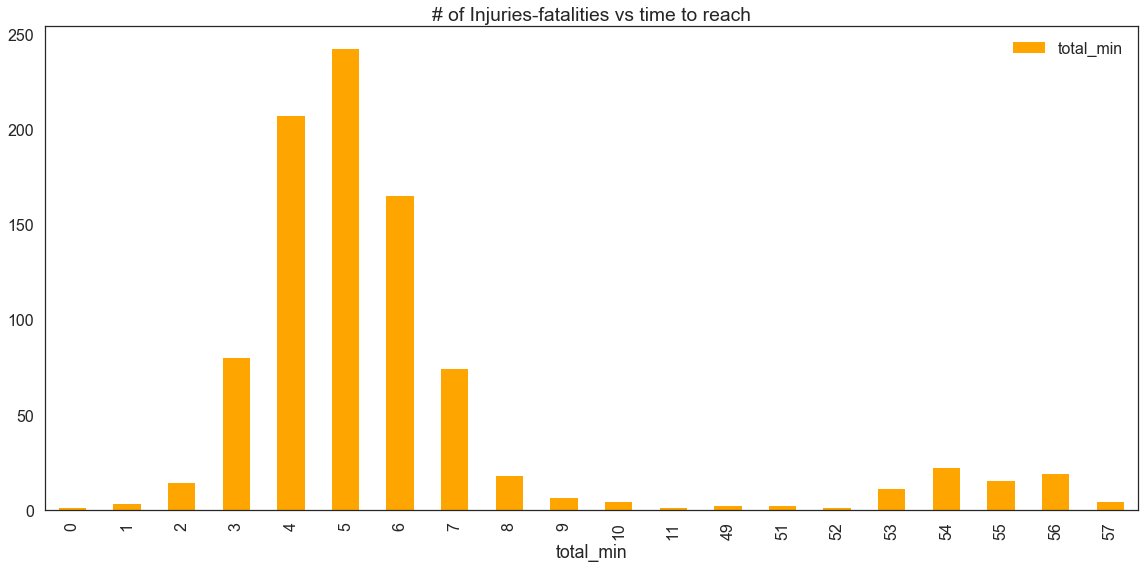

In [90]:
plotbar_1_3('total_min','# of Injuries-fatalities vs time to reach', df_tt_min_1)
#save_fig('Number of Injuries-fatalities vs time to reach')

Saving figure # of no Injuries-fatalities vs time to reach


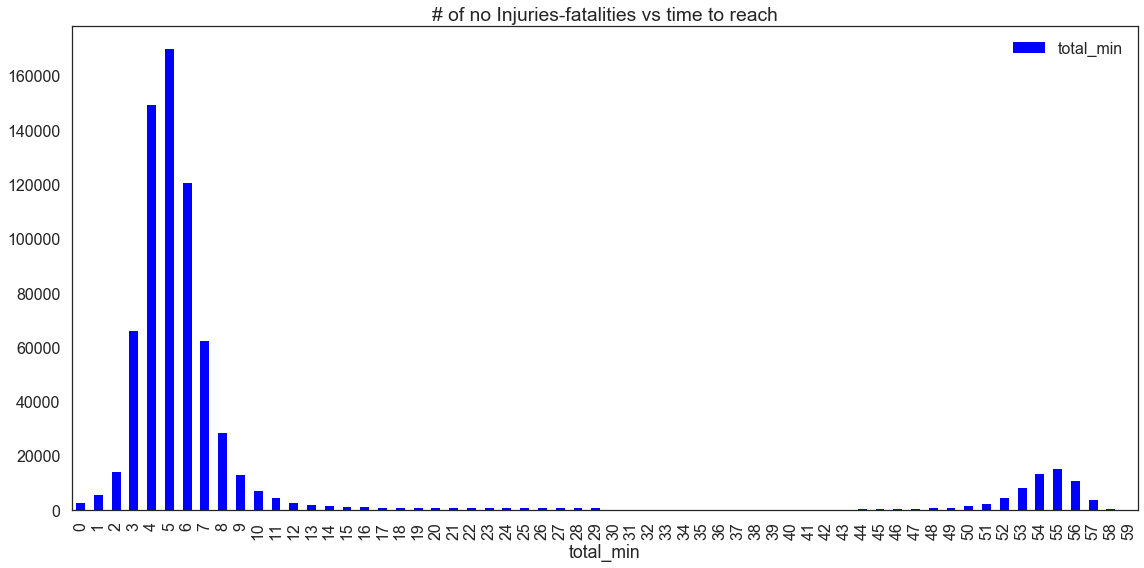

In [91]:
plotbar_0_3('total_min','# of no Injuries-fatalities vs time to reach', df_tt_min_0)
#save_fig('Number of No Injuries-fatalities vs time to reach')

Looking at the time it takes to reach the location of concern. It seems like there may be some concern of injuries if the paramedics or fire department does get there under 5 mins. 

- Scale this column between 0 and 1

### Number of Rescues vs Injuries

- We are trying to see if there is any corelation with number of rescues with injuries / fatalities 
- We call the method label_vs_injuries_and_fatalities, this method takes the dataframe and the label. 
- It will group the dataframe with that label and plots the graph between the label and injuries/ fatalities

Saving figure # of rescue vs # of no injuries & fatalities


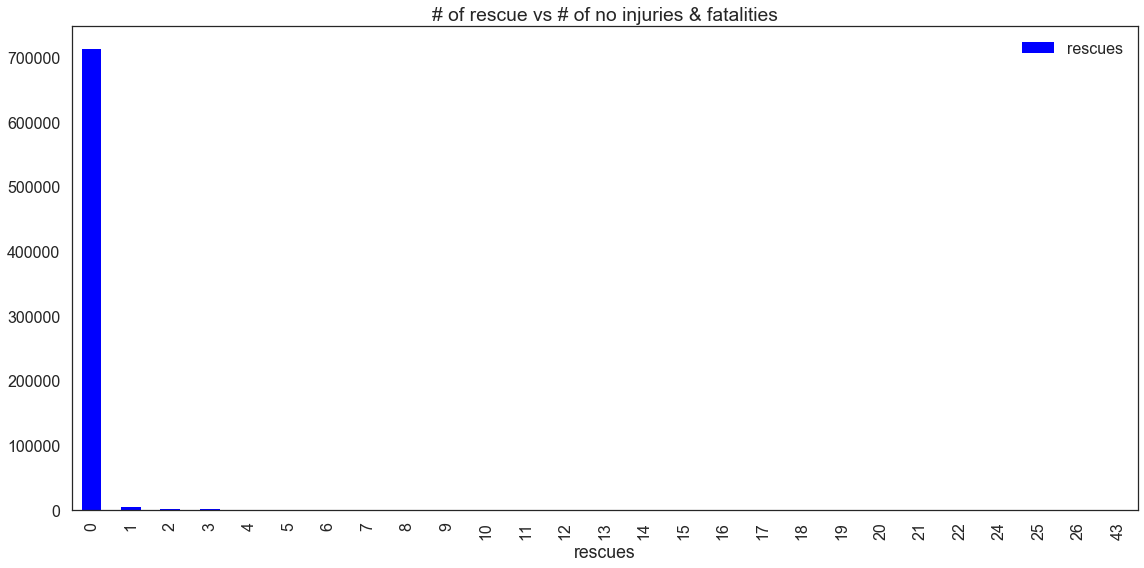

Saving figure # of rescue vs # of injuries & fatalities


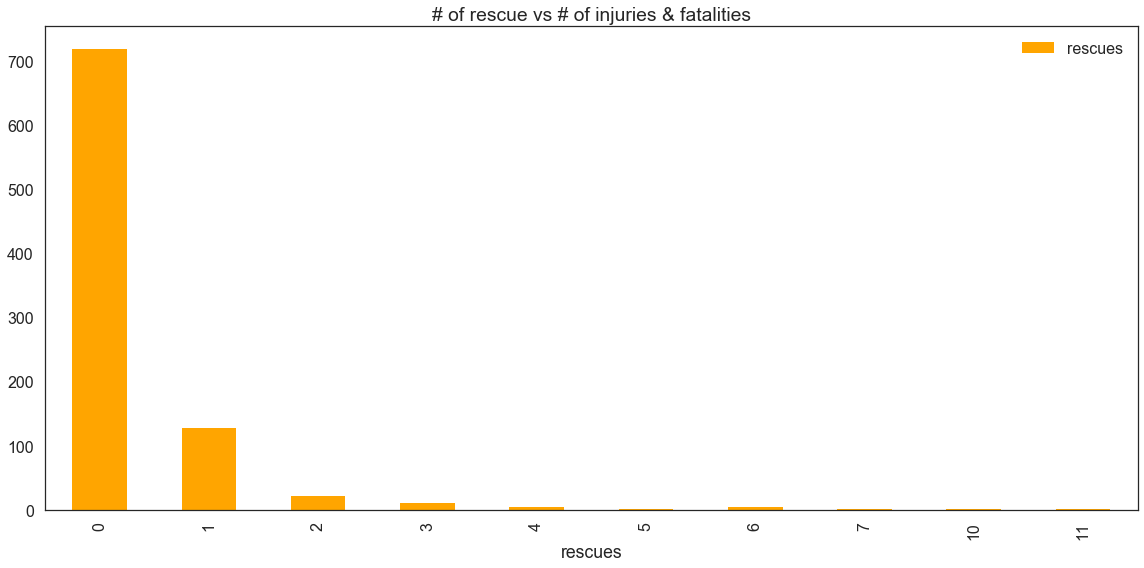

In [97]:
label_vs_injuries_and_fatalities(df, 'rescues', '# of rescue vs # of no injuries & fatalities', '# of rescue vs # of injuries & fatalities')

Saving figure # of rescue children vs # of no injuries & fatalities


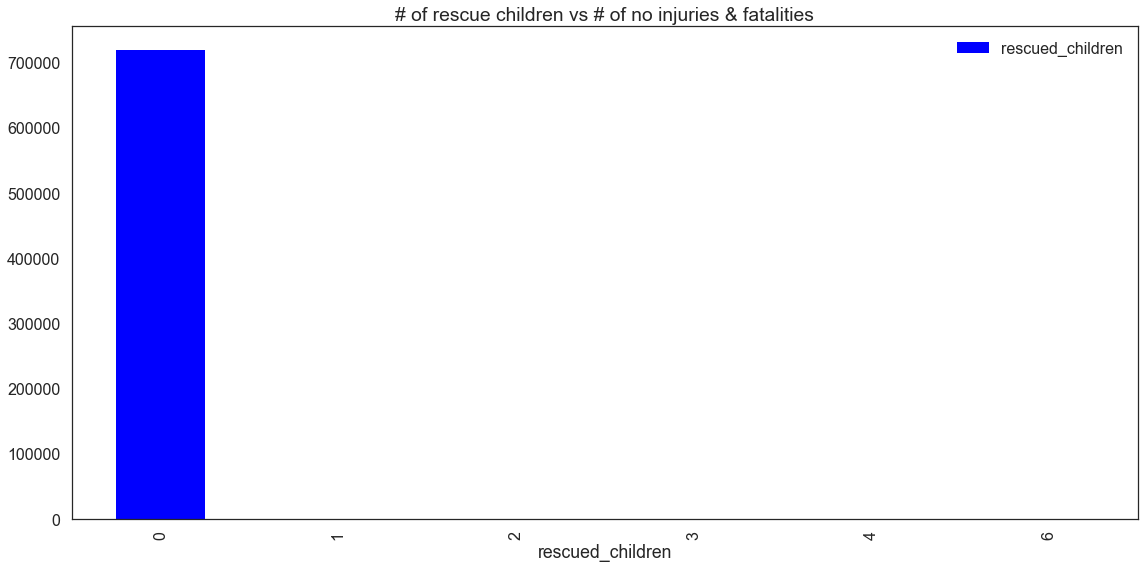

Saving figure # of rescue children vs # of injuries & fatalities


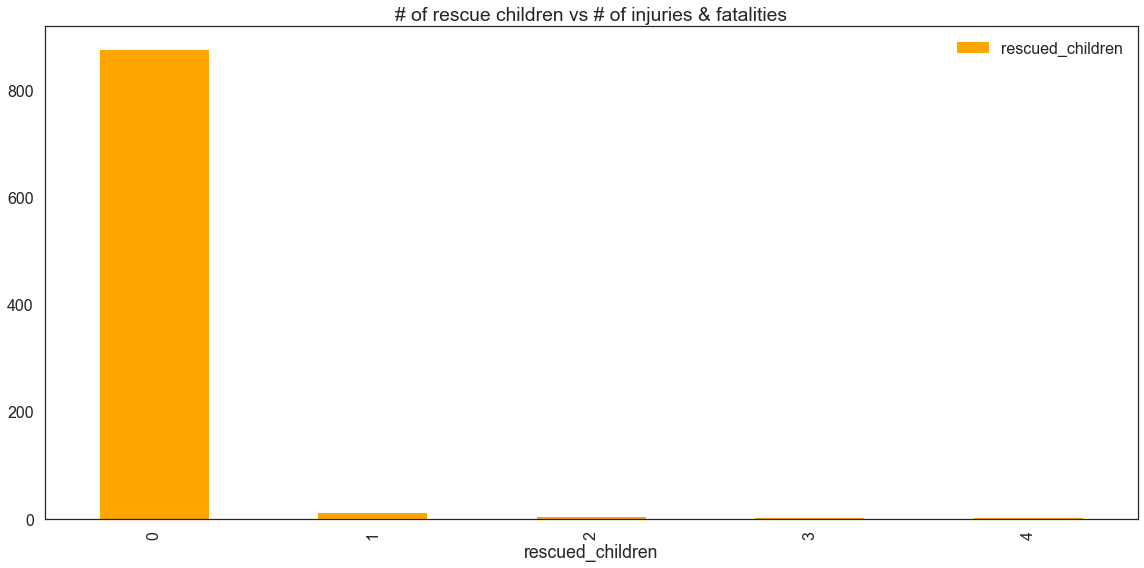

In [98]:
label_vs_injuries_and_fatalities(df, 'rescued_children', '# of rescue children vs # of no injuries & fatalities', '# of rescue children vs # of injuries & fatalities')

Saving figure # of rescue adults vs # of no injuries & fatalities


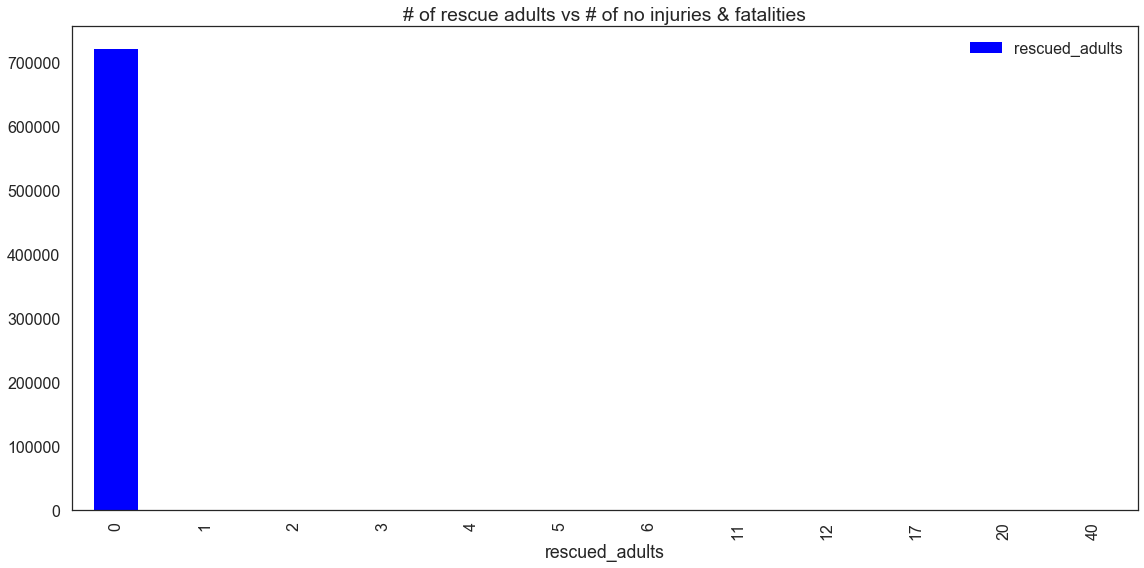

Saving figure # of rescue adults vs # of injuries & fatalities


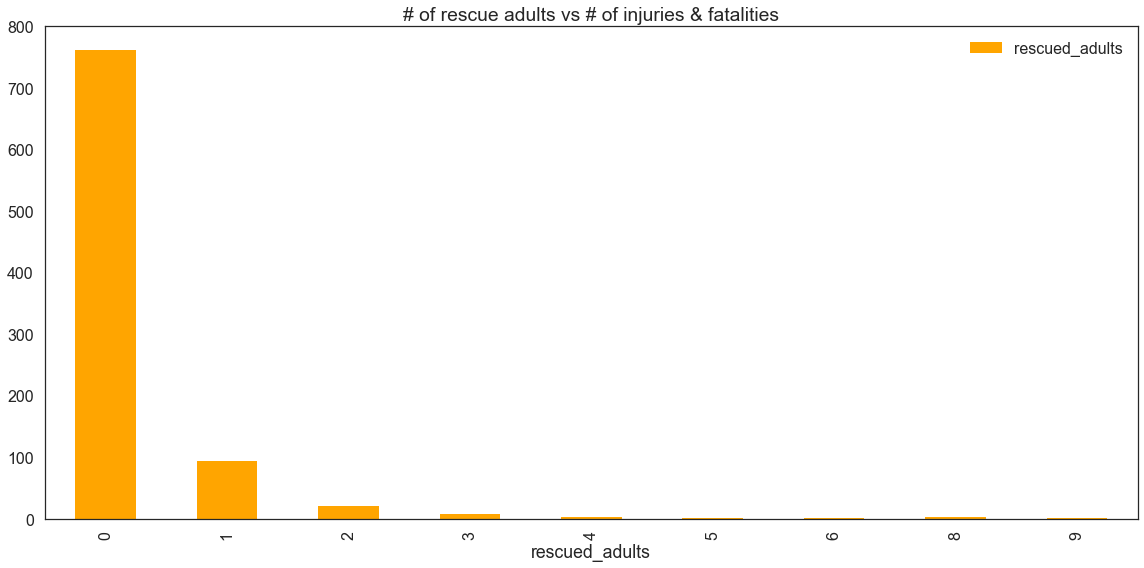

In [99]:
label_vs_injuries_and_fatalities(df, 'rescued_adults', '# of rescue adults vs # of no injuries & fatalities', '# of rescue adults vs # of injuries & fatalities')

Saving figure # of rescued seniors vs # of no injuries & fatalities


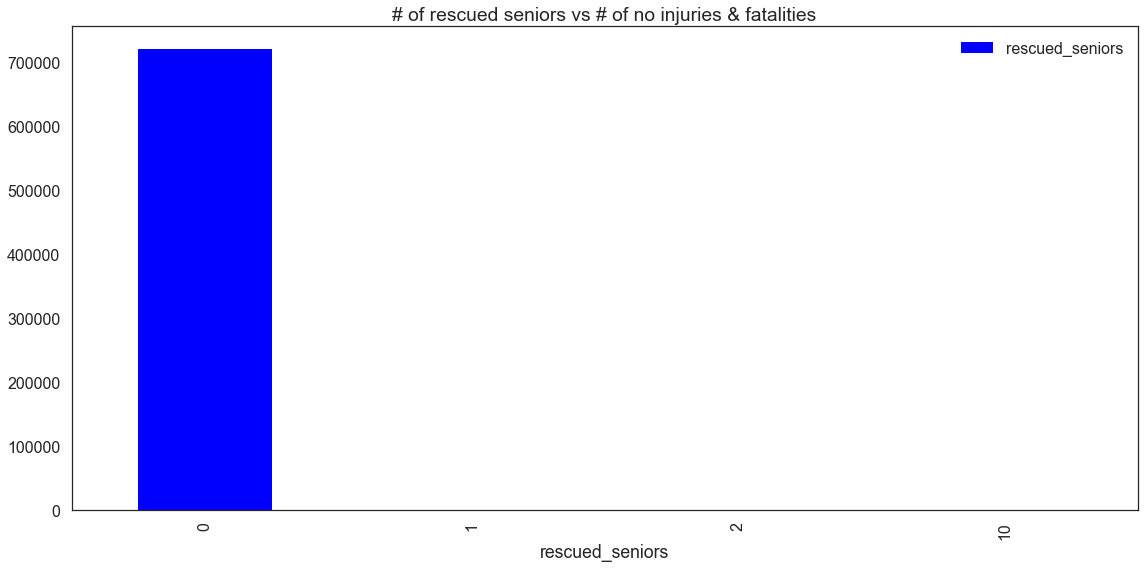

Saving figure # of rescued seniors vs # of injuries & fatalities


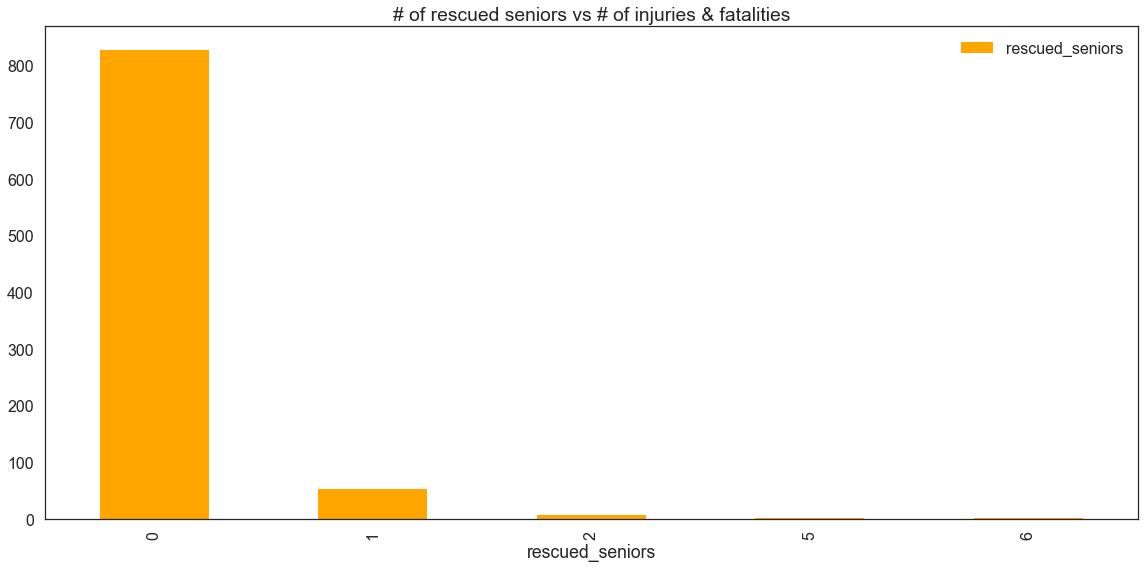

In [100]:
label_vs_injuries_and_fatalities(df, 'rescued_seniors', '# of rescued seniors vs # of no injuries & fatalities', '# of rescued seniors vs # of injuries & fatalities')

It seems like there is slight correlation of injuries with # of resuces.

- We see that whenever there was one rescue of any type we had almost some injuries. So this columns tells us that whenever there was a rescue there was a chance of injury

- We'll keep the 'rescues' column and scale it between 0 - 1
- Discard 'rescued_adults' column
- Discard 'rescued_children' column 
- Discard 'rescued_seniors' column 

###  Injuries vs Event Alarm Level

Saving figure No Injuries vs Event Alarm Level


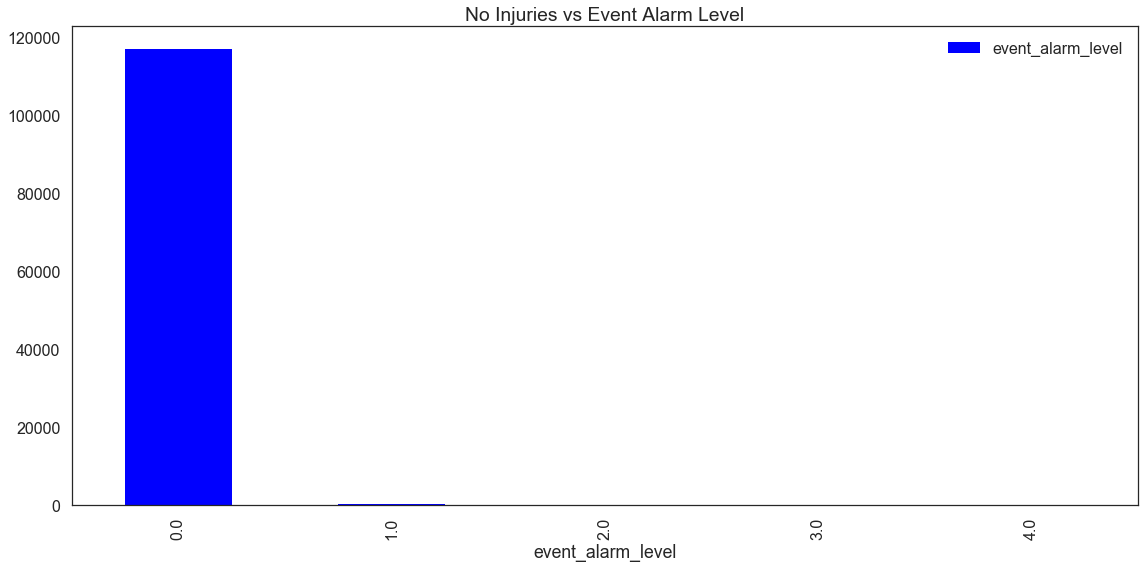

Saving figure Injuries_Fatality vs Event Alarm Level


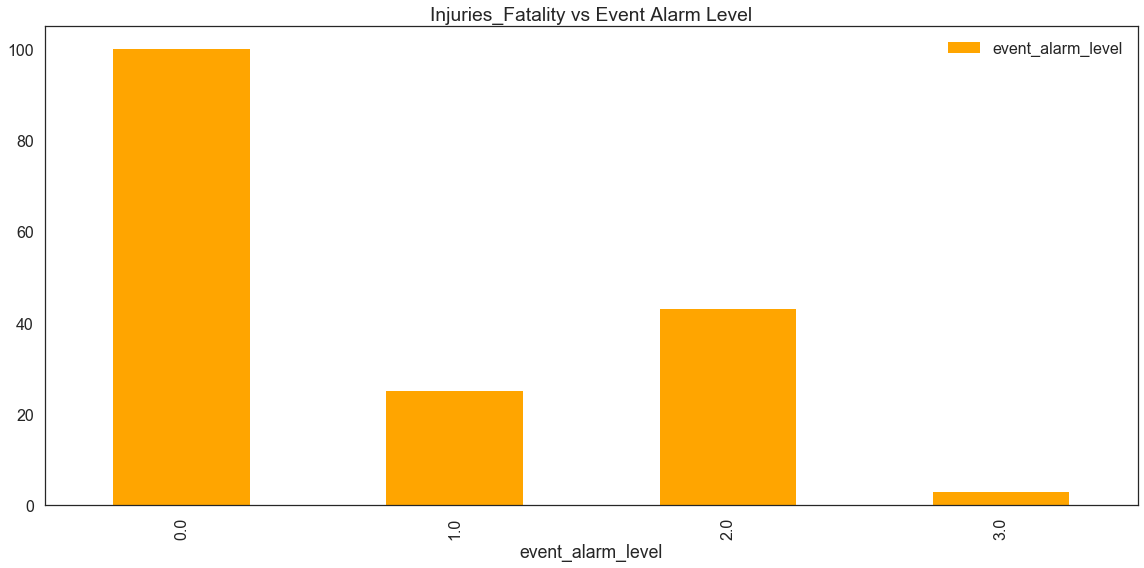

In [102]:
data_event_alarm = df.copy()
data_event_alarm = data_event_alarm[['event_alarm_level', 'total_inj_fatality']]

data_event_alarm_0 = get_noinjuries(data_event_alarm)
data_event_alarm_1 = get_injuries(data_event_alarm)
plotbar_0_3('event_alarm_level','No Injuries vs Event Alarm Level', data_event_alarm_0)
plotbar_1_3('event_alarm_level','Injuries_Fatality vs Event Alarm Level', data_event_alarm_1)

### OFM vs Injuries 

Plotting OFM vs injuries and no injuries

In [13]:
df['ofm_investigations_contacted'].value_counts()

0    719226
1      1144
Name: ofm_investigations_contacted, dtype: int64

Saving figure ofm vs no injuries & fatalities


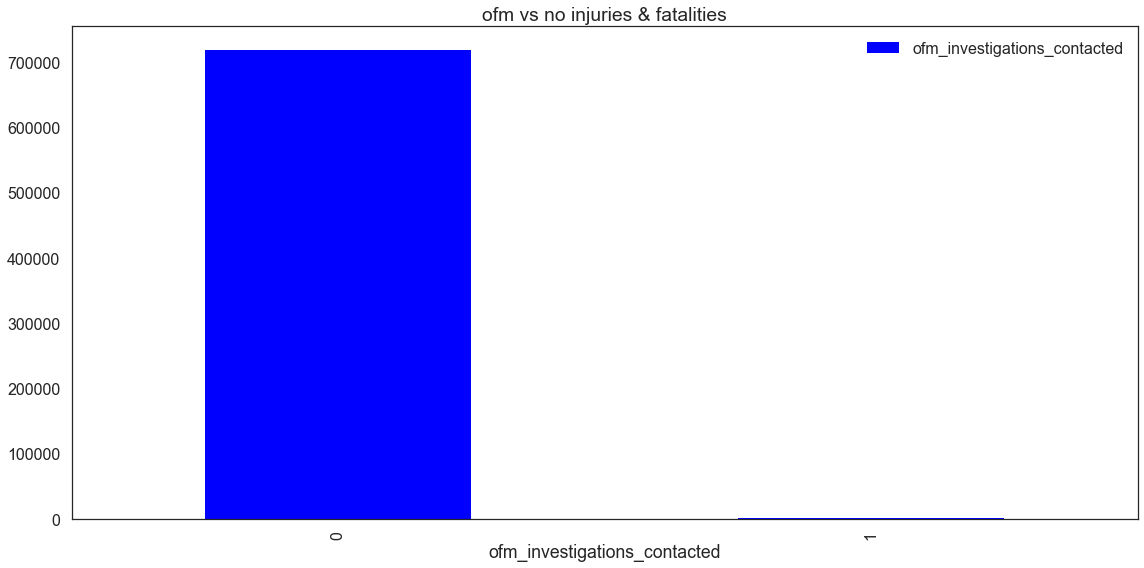

Saving figure ofm vs injuries & fatalities


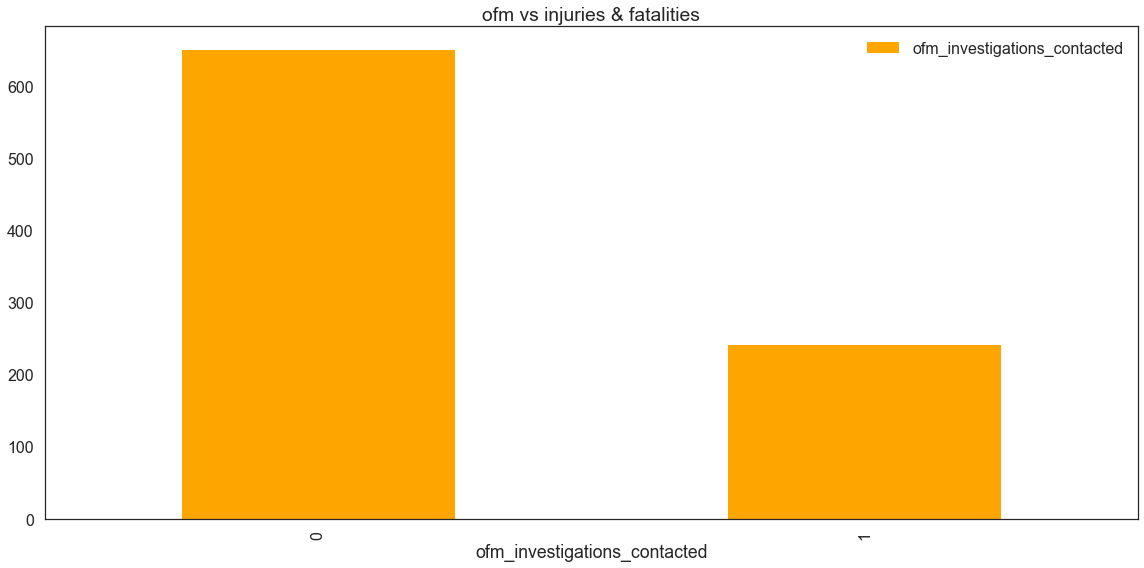

In [16]:
label_vs_injuries_and_fatalities(df,'ofm_investigations_contacted', 'ofm vs no injuries & fatalities', 'ofm vs injuries & fatalities')

In [17]:
df['ofm_investigations_contacted'].isna().sum()/len(df['ofm_investigations_contacted']) *100 > 0.0

False

### Aid to from other department vs Injuries

In [18]:
df['aid_to_from_other_depts'].value_counts()

4    707962
1     12408
Name: aid_to_from_other_depts, dtype: int64

In [19]:
df['aid_to_from_other_depts'].isna().sum()/len(df['aid_to_from_other_depts']) * 100 > 0.0

False

Saving figure aid from other departments vs no injuries & fatalities


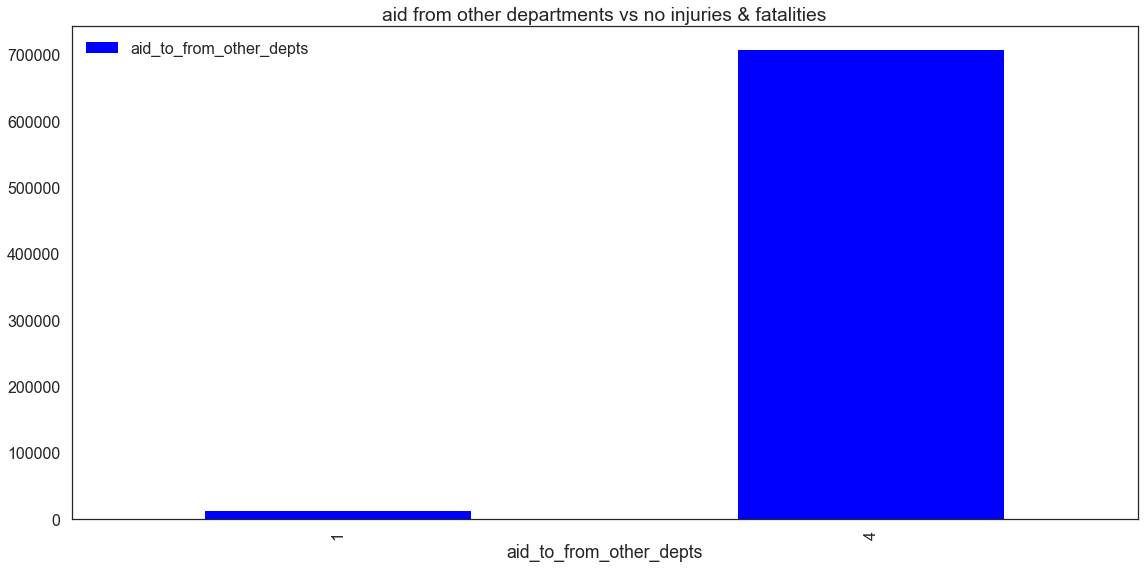

Saving figure aid from other departments vs injuries & fatalities


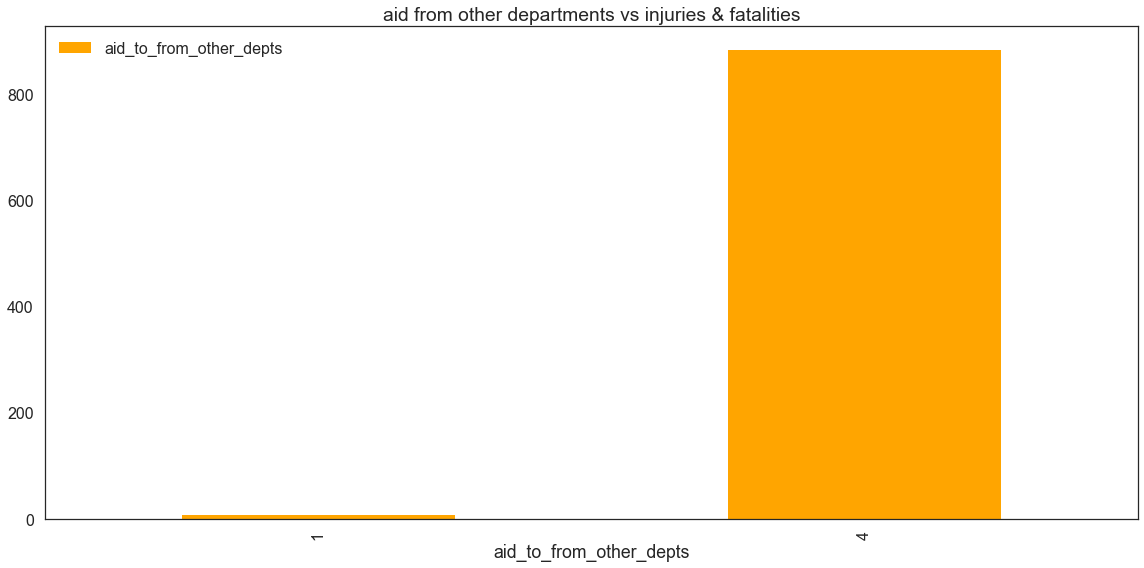

In [20]:
label_vs_injuries_and_fatalities(df, 'aid_to_from_other_depts', 'aid from other departments vs no injuries & fatalities', 'aid from other departments vs injuries & fatalities')

### Response_Type vs Injuries

In [21]:
df['response_type'].isna().sum()/len(df['response_type']) > 100.0

False

Saving figure response type vs no injuries & fatalities


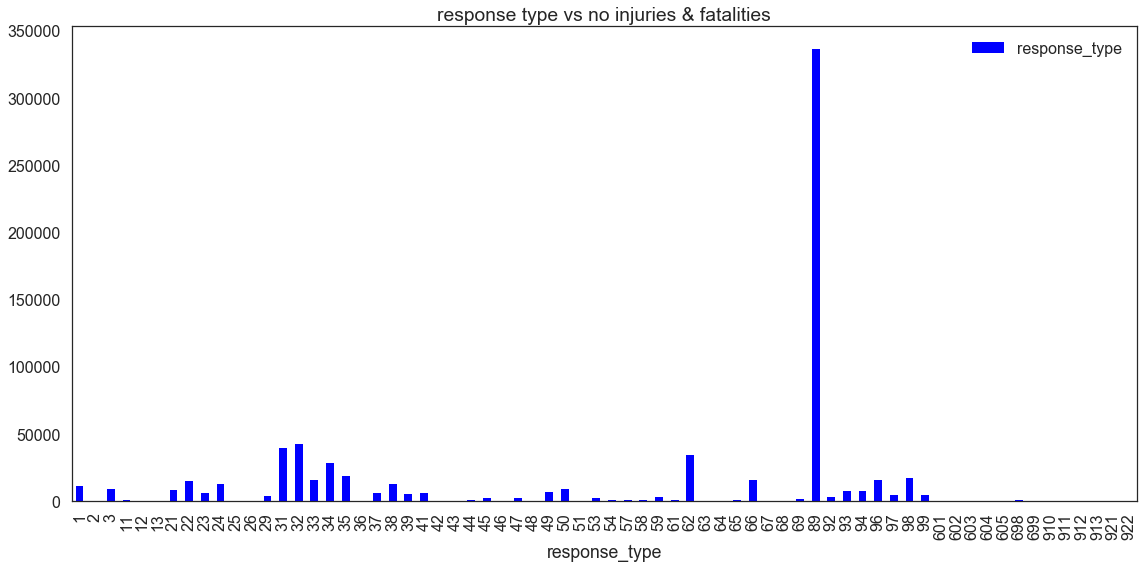

Saving figure response type vs injuries & fatalities


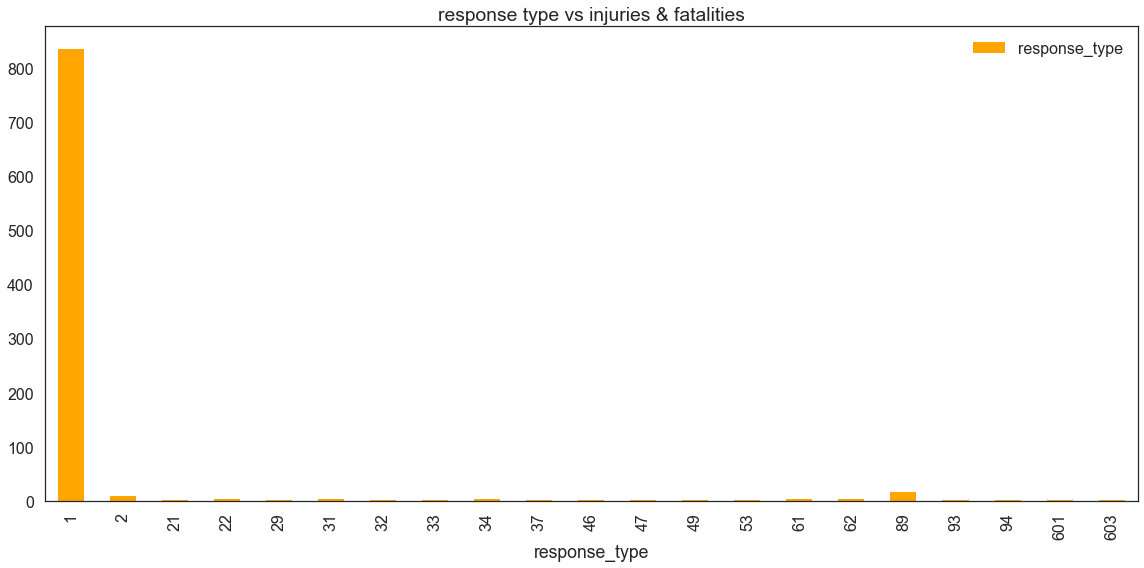

In [22]:
label_vs_injuries_and_fatalities(df, 'response_type', 'response type vs no injuries & fatalities', 'response type vs injuries & fatalities')

### Alarm_Level vs Injuries

In [23]:
df['event_alarm_level'].value_counts()

0.0    116941
1.0       256
2.0       221
3.0         7
4.0         1
Name: event_alarm_level, dtype: int64

In [24]:
alarmdf = df[(df['event_alarm_level'] == 2.0) & (df['total_inj_fatality'] == 1)]
print(alarmdf.shape)

(43, 61)


0.00615706913290072
Saving figure alarm level vs no injuries & fatalities 


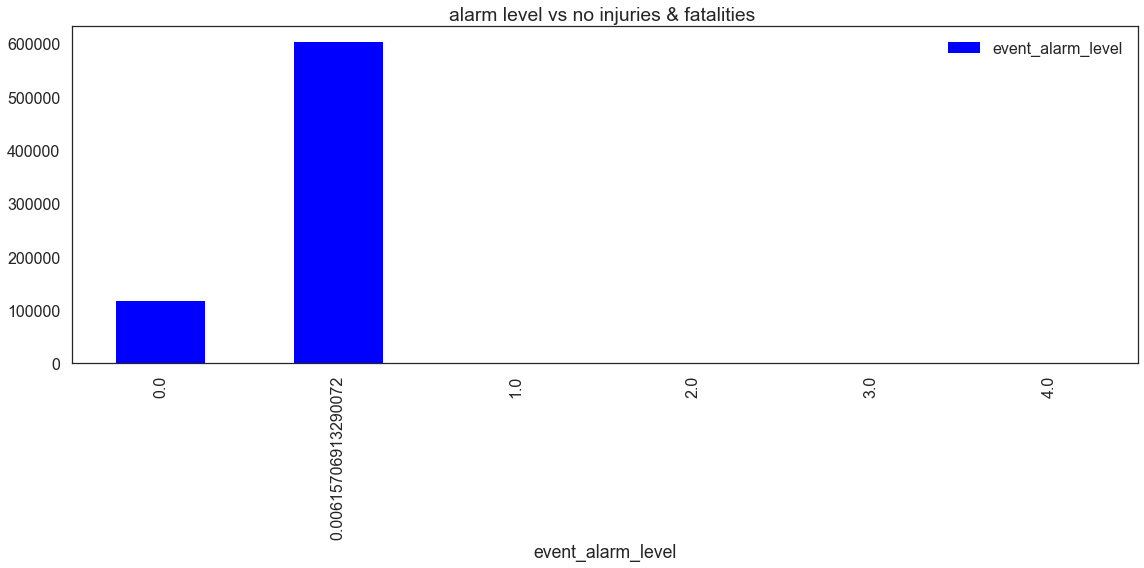

Saving figure alarm level vs injuries & fatalities


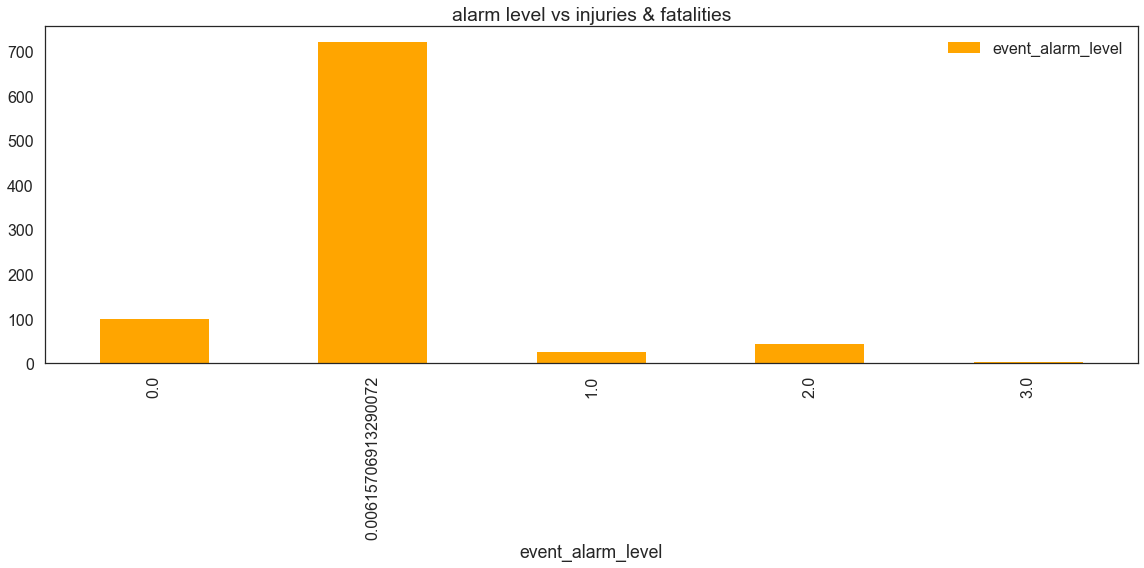

In [25]:
label_vs_injuries_and_fatalities(df, 'event_alarm_level', 'alarm level vs no injuries & fatalities ', 'alarm level vs injuries & fatalities')

### Responding Units vs Injuries

In [26]:
res_df = df[(df['responding_units'] == 22.0) & (df['total_inj_fatality'] == 0)]
print(res_df.shape)

(40, 61)


2.2834113985379085
Saving figure responding units vs no injuries & fatalities


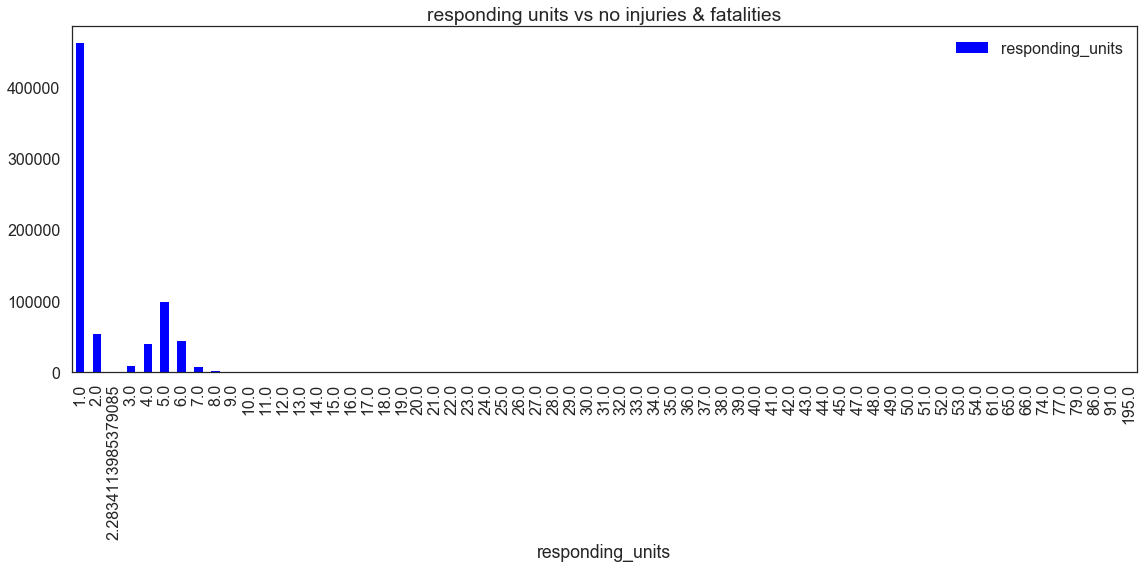

Saving figure responding units vs injuries & fatalities


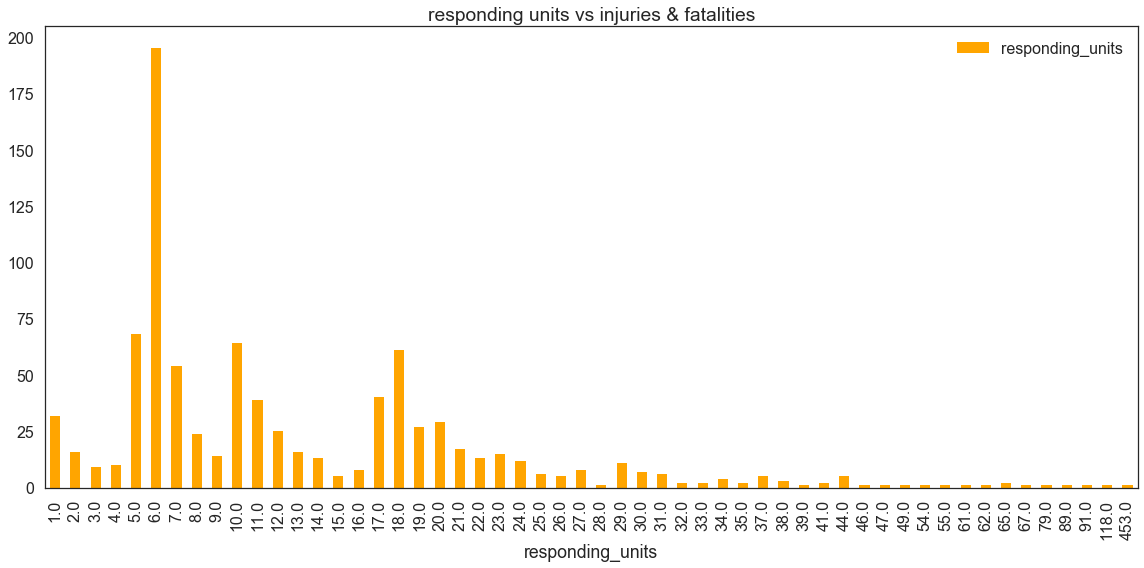

In [27]:
label_vs_injuries_and_fatalities(df, 'responding_units','responding units vs no injuries & fatalities', 'responding units vs injuries & fatalities')

### Data exploration and analysis

In [64]:
list_of_columns = ['opp', 'moe','tssa','esa','mol','ems','canutec',
           'gas','hydro','municipal_building_office','municipal_health_office',
           'municipal_police','other']

In [65]:
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

    return dataframe

In [66]:
recode_empty_cells(df, list_of_columns)

,Unnamed: 0,Unnamed: 0.1,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality
0,0,0,0,4,3.0,2011-01-01 00:10:02,0,0,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,0,0,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,0,0,01/01/2011,F11000010,0,3,43,4,NaN,0,0,0,0,0,0,0.0,10.0,2.0,0,0,301,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:03:43,0,0,0,0,0.0
1,1,1,1,4,1.0,2011-01-01 00:09:02,0,0,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,0,0,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,0,0,01/01/2011,F11000011,0,3,55,4,MOUNT PLEASANT RD,0,0,0,0,0,0,0.0,9.0,2.0,0,0,301,0,0,0,0,1.0,38,0,4,0,2011-01-01 00:03:55,0,0,0,0,0.0
2,2,2,2,4,3.0,2011-01-01 00:09:34,0,0,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,0,0,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,0,0,01/01/2011,F11000012,0,5,3,4,NaN,0,0,0,0,0,0,0.0,9.0,34.0,0,0,302,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:05:03,0,0,0,0,0.0
3,3,3,3,4,1.0,2011-01-01 00:10:46,0,0,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,0,0,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,0,0,01/01/2011,F11000013,0,4,46,4,DUFFERIN ST,0,0,0,0,0,0,0.0,10.0,46.0,0,0,861,0,0,0,0,1.0,3,0,4,0,2011-01-01 00:04:46,0,0,0,0,0.0
4,4,4,4,1,5.0,2011-01-01 00:11:03,0,0,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,0,0,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,0,0,01/01/2011,F11000014,0,6,7,4,SAN ROMANOWAY,0,0,0,0,0,0,0.0,11.0,3.0,0,0,323,0,0,0,0,4.0,33,0,14,0,2011-01-01 00:06:07,0,0,0,0,0.0
5,5,5,5,4,1.0,2011-01-01 00:13:46,0,0,NaN,WEST DON RIVER TRL,2011-01-01 00:07:23,0.0,7.0,23.0,0,0,3,0,0,NaN,Fire - Highrise Residential,FIHR,F11000015000,NaN,NaN,0,0,01/01/2011,F11000015,0,6,24,4,THORNCLIFFE PARK DR,0,0,0,0,0,0,0.0,13.0,46.0,0,0,323,0,0,0,0,5.0,34,0,17,0,2011-01-01 00:06:24,0,0,0,0,0.0
6,6,6,6,4,1.0,2011-01-01 00:12:54,0,0,01/01/11,LN W PERTH N RANDOLPH,2011-01-01 00:07:28,0.0,7.0,28.0,0,0,2,1000,0,NaN,Fire - Commercial/Industrial,FICI,F11000016000,NaN,NaN,0,0,01/01/2011,F11000016,0,6,48,4,ERNEST AVE,0,0,0,0,0,0,0.0,12.0,54.0,0,0,836,0,0,0,0,18.0,1,0,58,0,2011-01-01 00:06:48,0,0,0,0,0.0
7,7,7,7,4,3.0,2011-01-01 00:12:43,0,0,NaN,NaN,2011-01-01 00:08:51,0.0,8.0,51.0,0,0,2,0,0,NaN,Medical,MEU,F11000017000,NaN,M4J,0,0,01/01/2011,F11000017,0,8,26,4,NaN,0,0,0,0,0,0,0.0,12.0,43.0,0,0,152,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:08:26,0,0,0,0,0.0
8,8,8,8,4,3.0,2011-01-01 00:15:44,0,0,NaN,NaN,2011-01-01 00:09:31,0.0,9.0,31.0,0,0,2,0,0,NaN,Medical,MECR,F11000018000,NaN,M6K,0,0,01/01/2011,F11000018,0,8,56,4,NaN,0,0,0,0,0,0,0.0,15.0,44.0,0,0,896,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:08:56,0,0,0,0,0.0
9,9,9,9,4,4.0,2011-01-01 00:14:28,0,0,NaN,BARRINGTON AVE,2011-01-01 00:10:10,0.0,10.0,10.0,0,0,1,0,0,NaN,Fire - Residential,FIR,F11000019000,NaN,NaN,0,0,01/01/2011,F11000019,0,9,33,4,SECORD AVE,0,0,0,0,0,0,0.0,14.0,28.0,0,0,323,0,0,0,0,5.0,34,0,17,0,2011-01-01 00:09:33,0,0,0,0,0.0


In [67]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [68]:
df.drop("Unnamed: 0.1", axis=1, inplace=True)

In [69]:
#Convert the string to datetime format
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [70]:
df.dtypes

unnamed:0                                  int64
aid_to_from_other_depts                    int64
alarm_to_fd                              float64
arrive_date                               object
bld_height                                 int64
canutec                                   object
control_date                              object
cross_street                              object
dispatch_date                             object
dispatch_hour                            float64
dispatch_min                             float64
dispatch_sec                             float64
ems                                       object
esa                                       object
est_km                                     int64
est_loss                                   int64
est_num_persons_displaced                  int64
event_alarm_level                        float64
event_type                                object
event_type_cd                             object
fd_station          

### Day-of-Week vs Injuries

In [71]:
df['dow'] = df['incident_date'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['incident_date'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [72]:
df.head()

,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,dow,is_weekend
0,0,4,3.0,2011-01-01 00:10:02,0,0,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,0,0,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,0,0,2011-01-01,F11000010,0,3,43,4,NaN,0,0,0,0,0,0,0.0,10.0,2.0,0,0,301,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:03:43,0,0,0,0,0.0,5,1
1,1,4,1.0,2011-01-01 00:09:02,0,0,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,0,0,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,0,0,2011-01-01,F11000011,0,3,55,4,MOUNT PLEASANT RD,0,0,0,0,0,0,0.0,9.0,2.0,0,0,301,0,0,0,0,1.0,38,0,4,0,2011-01-01 00:03:55,0,0,0,0,0.0,5,1
2,2,4,3.0,2011-01-01 00:09:34,0,0,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,0,0,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,0,0,2011-01-01,F11000012,0,5,3,4,NaN,0,0,0,0,0,0,0.0,9.0,34.0,0,0,302,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:05:03,0,0,0,0,0.0,5,1
3,3,4,1.0,2011-01-01 00:10:46,0,0,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,0,0,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,0,0,2011-01-01,F11000013,0,4,46,4,DUFFERIN ST,0,0,0,0,0,0,0.0,10.0,46.0,0,0,861,0,0,0,0,1.0,3,0,4,0,2011-01-01 00:04:46,0,0,0,0,0.0,5,1
4,4,1,5.0,2011-01-01 00:11:03,0,0,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,0,0,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,0,0,2011-01-01,F11000014,0,6,7,4,SAN ROMANOWAY,0,0,0,0,0,0,0.0,11.0,3.0,0,0,323,0,0,0,0,4.0,33,0,14,0,2011-01-01 00:06:07,0,0,0,0,0.0,5,1


In [73]:
df_dow_inj = df[['dow', 'total_inj_fatality']]
df_dow_inj_1 = get_injuries(df_dow_inj)
df_dow_inj_0 = get_noinjuries(df_dow_inj)

Saving figure # of Injuries-Fatality vs day-of-week


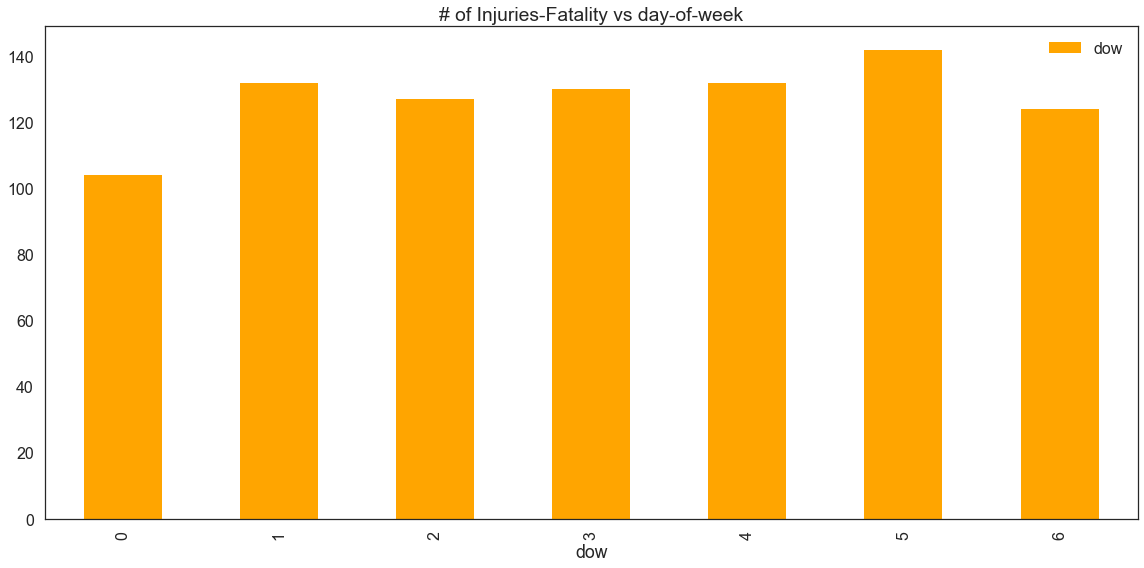

In [75]:
plotbar_1_3('dow','# of Injuries-Fatality vs day-of-week', df_dow_inj_1)
# Monday is 0, Sunday is 6


### Day-of-Week in Year vs Injuries / fatalities

In [76]:
df['year'] = df['incident_date'].apply(lambda x: x.date().year)

In [77]:
df.head()

,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,dow,is_weekend,year
0,0,4,3.0,2011-01-01 00:10:02,0,0,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,0,0,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,0,0,2011-01-01,F11000010,0,3,43,4,NaN,0,0,0,0,0,0,0.0,10.0,2.0,0,0,301,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:03:43,0,0,0,0,0.0,5,1,2011
1,1,4,1.0,2011-01-01 00:09:02,0,0,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,0,0,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,0,0,2011-01-01,F11000011,0,3,55,4,MOUNT PLEASANT RD,0,0,0,0,0,0,0.0,9.0,2.0,0,0,301,0,0,0,0,1.0,38,0,4,0,2011-01-01 00:03:55,0,0,0,0,0.0,5,1,2011
2,2,4,3.0,2011-01-01 00:09:34,0,0,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,0,0,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,0,0,2011-01-01,F11000012,0,5,3,4,NaN,0,0,0,0,0,0,0.0,9.0,34.0,0,0,302,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:05:03,0,0,0,0,0.0,5,1,2011
3,3,4,1.0,2011-01-01 00:10:46,0,0,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,0,0,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,0,0,2011-01-01,F11000013,0,4,46,4,DUFFERIN ST,0,0,0,0,0,0,0.0,10.0,46.0,0,0,861,0,0,0,0,1.0,3,0,4,0,2011-01-01 00:04:46,0,0,0,0,0.0,5,1,2011
4,4,1,5.0,2011-01-01 00:11:03,0,0,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,0,0,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,0,0,2011-01-01,F11000014,0,6,7,4,SAN ROMANOWAY,0,0,0,0,0,0,0.0,11.0,3.0,0,0,323,0,0,0,0,4.0,33,0,14,0,2011-01-01 00:06:07,0,0,0,0,0.0,5,1,2011


Saving figure Number of Injuries_Fatality vs Day of Week  


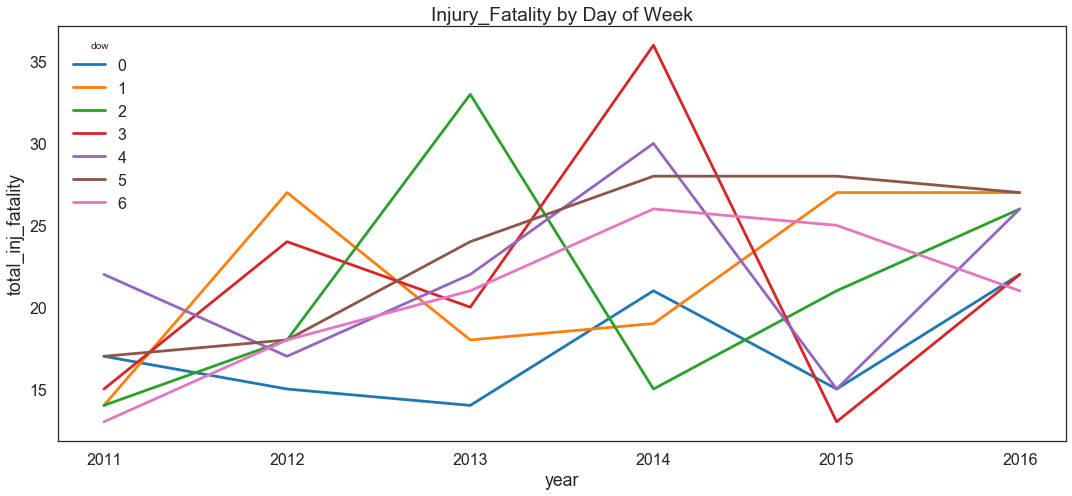

In [79]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['year', 'dow'])['total_inj_fatality'].sum().unstack().plot(ax=ax, title = 'Injury_Fatality by Day of Week')
plt.ylabel('total_inj_fatality')
save_fig('Number of Injuries_Fatality vs Day of Week  ')

Saving figure Injuries_Fatality vs Day of Week  


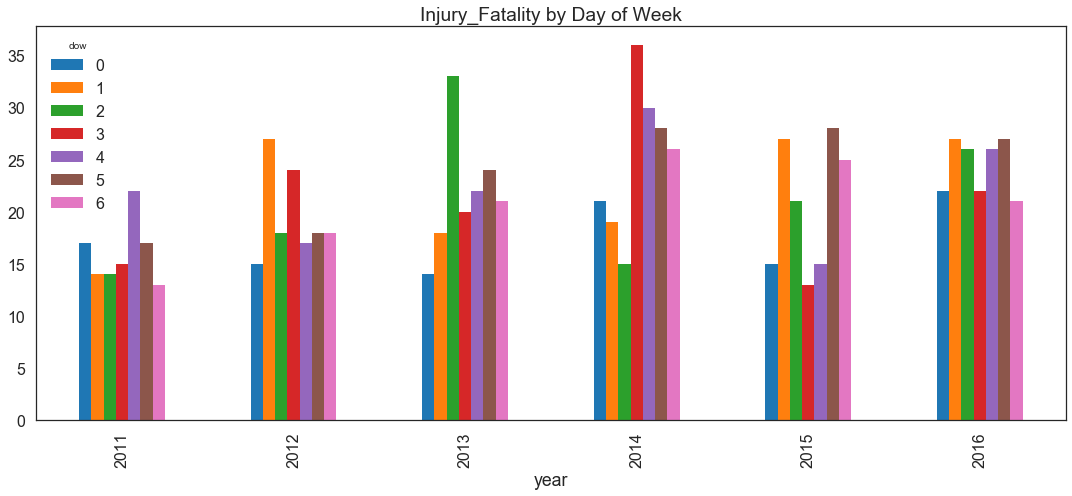

In [80]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['year', 'dow'])['total_inj_fatality'].sum().unstack().plot(kind = 'bar', ax=ax,
                                                                      title = 'Injury_Fatality by Day of Week')

save_fig('Injuries_Fatality vs Day of Week  ')

### Top 10 Event_Type_CD

Saving figure Top 10 Event Type CD


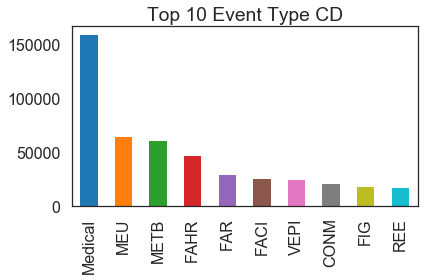

In [81]:
df['event_type_cd'].value_counts()[:10].plot(kind='bar', title = 'Top 10 Event Type CD')
save_fig('Top 10 Event Type CD')

### Top 10 events

In [82]:
df['event_type_cd'].value_counts()

Medical     158831
MEU          64176
METB         60585
FAHR         46474
FAR          28735
FACI         25573
VEPI         24852
CONM         20504
FIG          18462
REE          17365
MECP         16076
FIR          13976
VEPIH        13761
MEO          12386
CC           11658
FAHRD        10958
TEMS         10686
FAI          10275
FIHR          9633
NGASLK        9550
MESC          9529
WDH           7931
FACC          7878
MEA           7831
MEV           7074
HAZ1          6485
FAHCD         5795
VEAT          5735
VEF           5641
WAT           5526
             ...  
NGASFI          29
REWP            27
RETR            20
FAW             19
LKFI            19
TEST            18
FIWMI           17
ISHAZ1          16
HAZ3            13
ISHAZ2          13
LKME             9
PAJO             5
FIWH             5
FIW              4
WKFIRE           3
LKRT             3
ISHZ             2
MAAF             2
PAS              2
REENE            2
PASCBANE         2
ISPCF       

In [83]:
eventtype_cd = df['event_type_cd'].value_counts()[:10]

In [84]:
eventtype_cd = eventtype_cd.rename_axis('evtype').reset_index(name='counts')

In [85]:
evtype = eventtype_cd['evtype'].tolist() 

In [86]:
evtype

['Medical', 'MEU', 'METB', 'FAHR', 'FAR', 'FACI', 'VEPI', 'CONM', 'FIG', 'REE']

In [87]:

df[df.apply(lambda x: x['event_type_cd'] in eventtype_cd['evtype'], axis=1)]

,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,dow,is_weekend,year


Saving figure Top 10 Event types


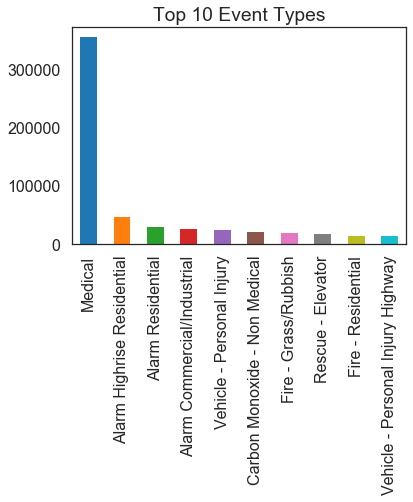

In [99]:
df['event_type'].value_counts()[:10].plot(kind='bar', title = 'Top 10 Event Types')
save_fig('Top 10 Event types', False)

### Incidents by Time of Day

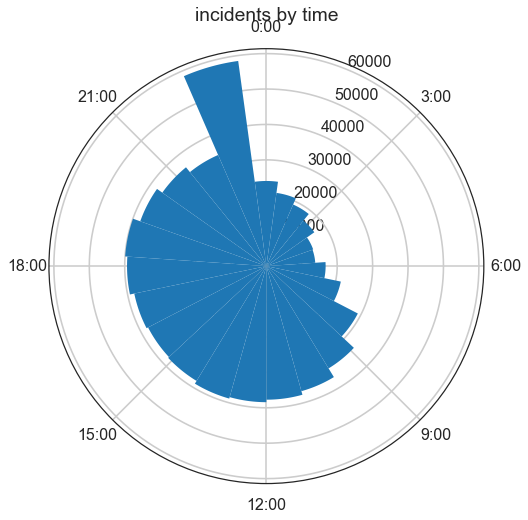

Saving figure Incidents by Time


In [103]:
N = 23
bottom = 2
int_hour = df['initial_call_hour'].tolist() 

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(int_hour, bins = 23)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
plt.title('incidents by time')
plt.show()
save_fig('Incidents by Time', False)

### Graphs related to if any government agency were contacted on the call 

In [113]:
#Load the file

def f(row):
    val = 0
    if row['opp'] == '1':
        val = 1
    elif row['moe'] == '1':
        val = 1
    elif row['tssa'] == '1':
        val = 1
    elif row['esa'] == '1':
        val = 1
    elif row['mol'] == '1':
        val = 1
    elif row['ems'] == '1':
        val = 1
    elif row['canutec'] == '1':
        val = 1
    elif row['gas'] == '1':
        val = 1
    elif row['hydro'] == '1':
        val = 1
    elif row['municipal_building_office'] == '1':
        val = 1
    elif row['municipal_health_office'] == '1':
        val = 1
    elif row['municipal_police'] == '1':
        val = 1
    return val

df['contacted'] = df.apply(f, axis=1)
df.info()
print("Done...")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720370 entries, 0 to 720369
Data columns (total 63 columns):
unnamed:0                         720370 non-null int64
aid_to_from_other_depts           720370 non-null int64
alarm_to_fd                       720369 non-null float64
arrive_date                       703568 non-null object
bld_height                        720370 non-null int64
canutec                           720370 non-null object
control_date                      241537 non-null object
cross_street                      330021 non-null object
dispatch_date                     719679 non-null object
dispatch_hour                     720193 non-null float64
dispatch_min                      720193 non-null float64
dispatch_sec                      720193 non-null float64
ems                               720370 non-null object
esa                               720370 non-null object
est_km                            720370 non-null int64
est_loss                          

Total Injuries value count: 0.0    719479
1.0       891
Name: total_inj_fatality, dtype: int64
Total Injuries is null: 0


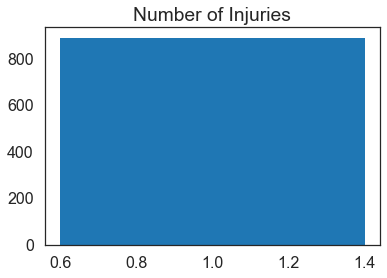

In [114]:
print("Total Injuries value count:" , df['total_inj_fatality'].value_counts())
print("Total Injuries is null:", df['total_inj_fatality'].isnull().sum())

plt.title("Number of Injuries")
x = [1]
y = [df['total_inj_fatality'].sum(), ]
plt.bar(x,y)
plt.show()

### Plotting OPP Contacted vs injuries / no injuries

OPP value count: 0    719431
1       939
Name: opp, dtype: int64
OPP Injuries is null: 0
[888.0, 3.0, 936]


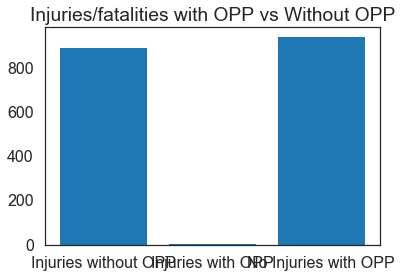

In [116]:
print("OPP value count:" , df['opp'].value_counts())
print("OPP Injuries is null:", df['opp'].isnull().sum())

inj_nopp = df[(df.total_inj_fatality == 1) & (df.opp != '1') ]
inj_opp =  df[(df.total_inj_fatality == 1) & (df.opp == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_opp = df[(df.total_inj_fatality != 1) & (df.opp == '1') ]

x = [1,2,3]
y = [inj_nopp.total_inj_fatality.sum(), inj_opp.total_inj_fatality.sum(), 
     ninj_opp.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with OPP vs Without OPP")
obj = ('Injuries without OPP','Injuries with OPP', 'No Injuries with OPP')
plt.bar(x,y, tick_label=obj)
plt.show()


### Plotting MOE Contacted vs injuries / no injuries

MOE value count: 0    719011
1      1359
Name: moe, dtype: int64
MOE Injuries is null: 0
[885.0, 6.0, 1353]


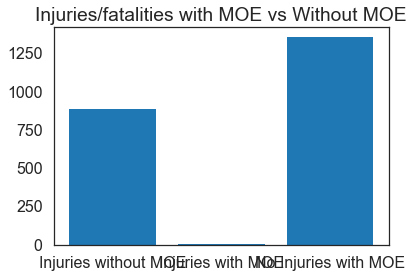

In [117]:
print("MOE value count:" , df['moe'].value_counts())
print("MOE Injuries is null:", df['moe'].isnull().sum())

inj_nmoe = df[(df.total_inj_fatality == 1) & (df.moe != '1') ]
inj_moe =  df[(df.total_inj_fatality == 1) & (df.moe == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_moe = df[(df.total_inj_fatality != 1) & (df.moe == '1') ]

x = [1,2,3]
y = [inj_nmoe.total_inj_fatality.sum(), inj_moe.total_inj_fatality.sum(), 
     ninj_moe.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with MOE vs Without MOE")
obj = ('Injuries without MOE','Injuries with MOE', 'No Injuries with MOE')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting TSSA Contacted vs injuries / no injuries

TSSA value count: 0    719822
1       548
Name: tssa, dtype: int64
TSSA Injuries is null: 0
[882.0, 9.0, 539]


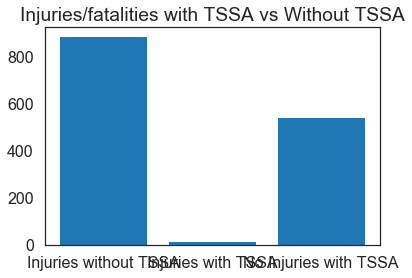

In [118]:
print("TSSA value count:" , df['tssa'].value_counts())
print("TSSA Injuries is null:", df['tssa'].isnull().sum())

inj_ntssa = df[(df.total_inj_fatality == 1) & (df.tssa != '1') ]
inj_tssa =  df[(df.total_inj_fatality == 1) & (df.tssa == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_tssa = df[(df.total_inj_fatality != 1) & (df.tssa == '1') ]

x = [1,2,3]
y = [inj_ntssa.total_inj_fatality.sum(), inj_tssa.total_inj_fatality.sum(), 
     ninj_tssa.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with TSSA vs Without TSSA")
obj = ('Injuries without TSSA','Injuries with TSSA', 'No Injuries with TSSA')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting ESA Contacted vs injuries / no injuries

ESA value count: 0    720080
1       290
Name: esa, dtype: int64
ESA Injuries is null: 0
[872.0, 19.0, 271]


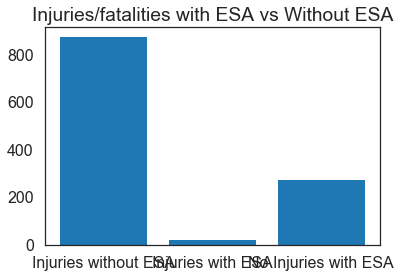

In [119]:
print("ESA value count:" , df['esa'].value_counts())
print("ESA Injuries is null:", df['esa'].isnull().sum())

inj_nesa = df[(df.total_inj_fatality == 1) & (df.esa != '1') ]
inj_esa =  df[(df.total_inj_fatality == 1) & (df.esa == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_esa = df[(df.total_inj_fatality != 1) & (df.esa == '1') ]

x = [1,2,3]
y = [inj_nesa.total_inj_fatality.sum(), inj_esa.total_inj_fatality.sum(), 
     ninj_esa.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with ESA vs Without ESA")
obj = ('Injuries without ESA','Injuries with ESA', 'No Injuries with ESA')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting MOL Contacted vs injuries / no injuries

MOL value count: 0    720080
1       290
Name: mol, dtype: int64
MOL Injuries is null: 0
[873.0, 18.0, 272]


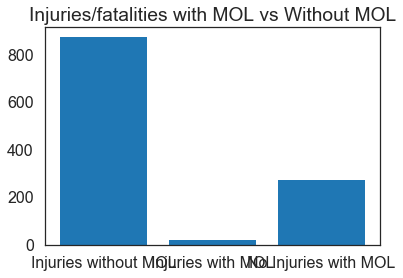

In [120]:
print("MOL value count:" , df['mol'].value_counts())
print("MOL Injuries is null:", df['mol'].isnull().sum())

inj_nmol = df[(df.total_inj_fatality == 1) & (df.mol != '1') ]
inj_mol =  df[(df.total_inj_fatality == 1) & (df.mol == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_mol = df[(df.total_inj_fatality != 1) & (df.mol == '1') ]

x = [1,2,3]
y = [inj_nmol.total_inj_fatality.sum(), inj_mol.total_inj_fatality.sum(), 
     ninj_mol.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with MOL vs Without MOL")
obj = ('Injuries without MOL','Injuries with MOL', 'No Injuries with MOL')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting EMS Contacted vs injuries / no injuries

EMS value count: 0    720325
1        45
Name: ems, dtype: int64
EMS Injuries is null: 0
[890.0, 1.0, 44]


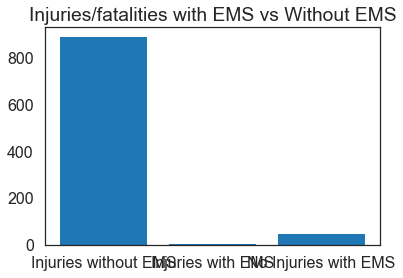

In [121]:
print("EMS value count:" , df['ems'].value_counts())
print("EMS Injuries is null:", df['ems'].isnull().sum())

inj_nems = df[(df.total_inj_fatality == 1) & (df.ems != '1') ]
inj_ems =  df[(df.total_inj_fatality == 1) & (df.ems == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_ems = df[(df.total_inj_fatality != 1) & (df.ems == '1') ]

x = [1,2,3]
y = [inj_nems.total_inj_fatality.sum(), inj_ems.total_inj_fatality.sum(), 
     ninj_ems.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with EMS vs Without EMS")
obj = ('Injuries without EMS','Injuries with EMS', 'No Injuries with EMS')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting canutec Contacted vs injuries / no injuries

canutec value count: 0    720138
1       232
Name: canutec, dtype: int64
canutec Injuries is null: 0
[891.0, 0.0, 232]


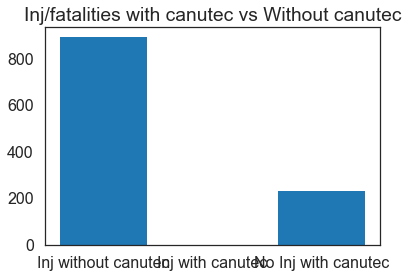

In [122]:
print("canutec value count:" , df['canutec'].value_counts())
print("canutec Injuries is null:", df['canutec'].isnull().sum())

inj_ncanutec = df[(df.total_inj_fatality == 1) & (df.canutec != '1') ]
inj_canutec =  df[(df.total_inj_fatality == 1) & (df.canutec == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_canutec = df[(df.total_inj_fatality != 1) & (df.canutec == '1') ]

x = [1,2,3]
y = [inj_ncanutec.total_inj_fatality.sum(), inj_canutec.total_inj_fatality.sum(), 
     ninj_canutec.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with canutec vs Without canutec")
obj = ('Inj without canutec','Inj with canutec', 'No Inj with canutec')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting gas Contacted vs injuries / no injuries

gas value count: 0    715150
1      5220
Name: gas, dtype: int64
gas Injuries is null: 0
[702.0, 189.0, 5031]


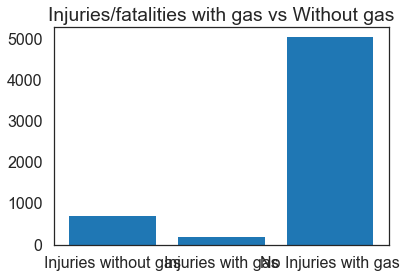

In [123]:
print("gas value count:" , df['gas'].value_counts())
print("gas Injuries is null:", df['gas'].isnull().sum())

inj_ngas = df[(df.total_inj_fatality == 1) & (df.gas != '1') ]
inj_gas =  df[(df.total_inj_fatality == 1) & (df.gas == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_gas = df[(df.total_inj_fatality != 1) & (df.gas == '1') ]

x = [1,2,3]
y = [inj_ngas.total_inj_fatality.sum(), inj_gas.total_inj_fatality.sum(), 
     ninj_gas.total_inj_fatality.count()]
print(y)
plt.title("Injuries/fatalities with gas vs Without gas")
obj = ('Injuries without gas','Injuries with gas', 'No Injuries with gas')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting hydro Contacted vs injuries / no injuries

hydro value count: 0    715966
1      4404
Name: hydro, dtype: int64
hydro Injuries is null: 0
[664.0, 227.0, 4177]


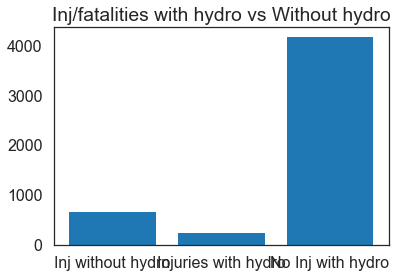

In [124]:
print("hydro value count:" , df['hydro'].value_counts())
print("hydro Injuries is null:", df['hydro'].isnull().sum())

inj_nhydro = df[(df.total_inj_fatality == 1) & (df.hydro != '1') ]
inj_hydro =  df[(df.total_inj_fatality == 1) & (df.hydro == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_hydro = df[(df.total_inj_fatality != 1) & (df.hydro == '1') ]

x = [1,2,3]
y = [inj_nhydro.total_inj_fatality.sum(), inj_hydro.total_inj_fatality.sum(), 
     ninj_hydro.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with hydro vs Without hydro")
obj = ('Inj without hydro','Injuries with hydro', 'No Inj with hydro')
plt.bar(x,y, tick_label=obj)
plt.show()

### Plotting municipal Contacted vs injuries / no injuries

municipal_building_office value count: 0    720142
1       228
Name: municipal_building_office, dtype: int64
municipal_building_office Injuries is null: 0
[876.0, 15.0, 213]


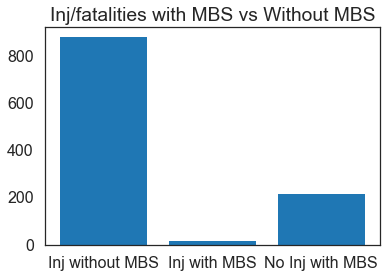

In [125]:
print("municipal_building_office value count:" , df['municipal_building_office'].value_counts())
print("municipal_building_office Injuries is null:", df['municipal_building_office'].isnull().sum())

inj_nmunicipal_building_office = df[(df.total_inj_fatality == 1) & (df.municipal_building_office != '1') ]
inj_municipal_building_office =  df[(df.total_inj_fatality == 1) & (df.municipal_building_office == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_municipal_building_office = df[(df.total_inj_fatality != 1) & (df.municipal_building_office == '1') ]

x = [1,2,3]
y = [inj_nmunicipal_building_office.total_inj_fatality.sum(), inj_municipal_building_office.total_inj_fatality.sum(), 
     ninj_municipal_building_office.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with MBS vs Without MBS")
obj = ('Inj without MBS','Inj with MBS', 
       'No Inj with MBS')
plt.bar(x,y, tick_label=obj)
plt.show()

municipal_health_office value count: 0    719008
1      1362
Name: municipal_health_office, dtype: int64
mmunicipal_health_office Injuries is null: 0
[877.0, 14.0, 1348]


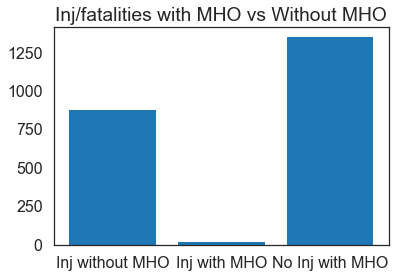

In [126]:
print("municipal_health_office value count:" , df['municipal_health_office'].value_counts())
print("mmunicipal_health_office Injuries is null:", df['municipal_health_office'].isnull().sum())

inj_nmunicipal_health_office = df[(df.total_inj_fatality == 1) & (df.municipal_health_office != '1') ]
inj_municipal_health_office =  df[(df.total_inj_fatality == 1) & (df.municipal_health_office == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_municipal_health_office = df[(df.total_inj_fatality != 1) & (df.municipal_health_office == '1') ]

x = [1,2,3]
y = [inj_nmunicipal_health_office.total_inj_fatality.sum(), inj_municipal_health_office.total_inj_fatality.sum(), 
     ninj_municipal_health_office.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with MHO vs Without MHO")
obj = ('Inj without MHO','Inj with MHO', 
       'No Inj with MHO')
plt.bar(x,y, tick_label=obj)
plt.show()

municipal_police value count: 0    718973
1      1397
Name: municipal_police, dtype: int64
municipal_police Injuries is null: 0
[831.0, 60.0, 1337]


<Container object of 3 artists>

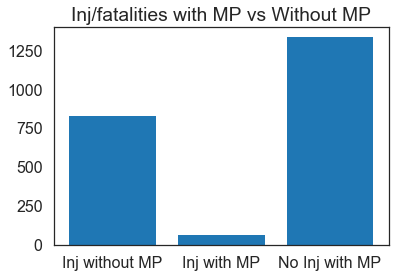

In [127]:
print("municipal_police value count:" , df['municipal_police'].value_counts())
print("municipal_police Injuries is null:", df['municipal_police'].isnull().sum())

inj_nmunicipal_police = df[(df.total_inj_fatality == 1) & (df.municipal_police != '1') ]
inj_municipal_police =  df[(df.total_inj_fatality == 1) & (df.municipal_police == '1') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_municipal_police = df[(df.total_inj_fatality != 1) & (df.municipal_police == '1') ]

x = [1,2,3]
y = [inj_nmunicipal_police.total_inj_fatality.sum(), inj_municipal_police.total_inj_fatality.sum(), 
     ninj_municipal_police.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with MP vs Without MP")
obj = ('Inj without MP','Inj with MP', 
       'No Inj with MP')
plt.bar(x,y, tick_label=obj)

### Plotting Building height vs injuries / no injuries

bld_height value count: small     6528
no_val     477
med        128
high        11
Name: bld_height_bin, dtype: int64
bld_height Injuries is null: 713226
[653.0, 9.0, 0]


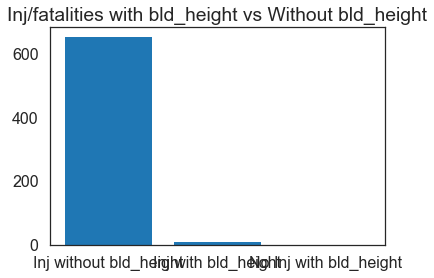

In [128]:
group_labels = ['small', 'med', 'high', 'no_val']
bin_val = [1,33,66,101,10001]
df['bld_height_bin'] = pd.cut(df.bld_height, bins=bin_val, labels=group_labels)


print("bld_height value count:" , df['bld_height_bin'].value_counts())
print("bld_height Injuries is null:", df['bld_height_bin'].isnull().sum())



inj_nbld_height = df[(df.total_inj_fatality == 1) & (df.bld_height_bin == 'small') ]
inj_bld_height =  df[(df.total_inj_fatality == 1) & (df.bld_height_bin == 'med') ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_bld_height = df[(df.total_inj_fatality == 1) & (df.bld_height_bin == 'high') ]

x = [1,2,3]
y = [inj_nbld_height.total_inj_fatality.sum(), inj_bld_height.total_inj_fatality.sum(), 
     ninj_bld_height.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with bld_height vs Without bld_height")
obj = ('Inj without bld_height','Inj with bld_height', 
       'No Inj with bld_height')
plt.bar(x,y, tick_label=obj)
plt.show()

contacted value count: 0    706204
1     14166
Name: contacted, dtype: int64
contacted Injuries is null: 0
[613.0, 278.0, 13888]


<Container object of 3 artists>

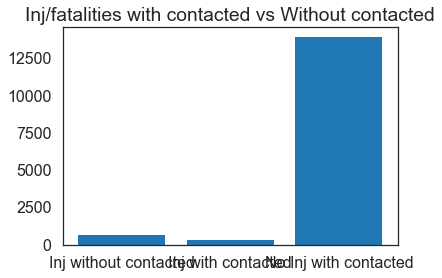

In [129]:
print("contacted value count:" , df['contacted'].value_counts())
print("contacted Injuries is null:", df['contacted'].isnull().sum())

inj_ncontacted = df[(df.total_inj_fatality == 1) & (df.contacted != 1) ]
inj_contacted =  df[(df.total_inj_fatality == 1) & (df.contacted == 1) ]
#ninj_nopp = df[(df.total_inj_fatality != 1) & (df.opp != '1') ]
ninj_contacted = df[(df.total_inj_fatality != 1) & (df.contacted == 1) ]

x = [1,2,3]
y = [inj_ncontacted.total_inj_fatality.sum(), inj_contacted.total_inj_fatality.sum(), 
     ninj_contacted.total_inj_fatality.count()]
print(y)
plt.title("Inj/fatalities with contacted vs Without contacted")
obj = ('Inj without contacted','Inj with contacted', 
       'No Inj with contacted')
plt.bar(x,y, tick_label=obj)

### Making CSV
- After looking at all the columns and its effect on injuries and fatalities.
- we make three .csv files which has the relavant which could be an important factor in detecting injuries and fatalities

#### Making CSV1

- Based on the exploratory analysis we have done so far. We'll narrow the column we think are intersting and will have some effect on the injuries / fatalities

In [55]:
df_tt_min['rescues'].isna().sum()/len(df_tt_min['rescues']) *100 > 0.0

False

In [56]:

_v = df_tt_min['rescues'].mean()
print(_v)
df_tt_min['rescues'].fillna(value=_v, inplace=True)

0.026537751433291224


In [57]:
df_tt_min['rescues_unscaled'] = df_tt_min['rescues']

In [58]:
scaler = StandardScaler()

In [59]:
rescues_scaled = scaler.fit_transform(df_tt_min[['rescues_unscaled']])

In [60]:
rescues_scaled.shape

(720370, 1)

In [61]:
df_tt_min['rescues_scaled'] = rescues_scaled

In [62]:
df_final = df_tt_min[['rescues_unscaled','rescues_scaled','min_to_reach_unscaled','min_to_reach_scaled','incident_number']]

In [63]:
df_final.to_csv('./dataset/data/TFSDataSetWithTotalFatality_1.csv')

In [130]:
df_final.head()

,unnamed:0,aid_to_from_other_depts,alarm_to_fd,arrive_date,bld_height,canutec,control_date,cross_street,dispatch_date,dispatch_hour,dispatch_min,dispatch_sec,ems,esa,est_km,est_loss,est_num_persons_displaced,event_alarm_level,event_type,event_type_cd,fd_station,fire_dept_incident,fsa,gas,hydro,incident_date,incident_number,initial_call_hour,initial_call_min,initial_call_sec,initial_unit_personnel,main_street,moe,mol,municipal_building_office,municipal_health_office,municipal_police,ofm_investigations_contacted,onscene_hour,onscene_min,onscene_sec,opp,other,property,rescued_adults,rescued_children,rescued_seniors,rescues,responding_units,response_type,smoke_alarm_impact_on_num_evac,total_num_personnel,tssa,incident_date_time,ff_injuries,ff_fatalities,civilian_fire_injury,civilian_fire_fatality,total_inj_fatality,dow,is_weekend,year,contacted,bld_height_bin
0,0,4,3.0,2011-01-01 00:10:02,0,0,NaN,NaN,2011-01-01 00:04:13,0.0,4.0,13.0,0,0,1,0,0,NaN,Medical,MEB,F11000010000,NaN,M6N,0,0,2011-01-01,F11000010,0,3,43,4,NaN,0,0,0,0,0,0,0.0,10.0,2.0,0,0,301,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:03:43,0,0,0,0,0.0,5,1,2011,0,NaN
1,1,4,1.0,2011-01-01 00:09:02,0,0,NaN,LAWRENCE AVE E,2011-01-01 00:04:46,0.0,4.0,46.0,0,0,1,0,0,NaN,Carbon Monoxide - Non Medical,CONM,F11000011000,NaN,NaN,0,0,2011-01-01,F11000011,0,3,55,4,MOUNT PLEASANT RD,0,0,0,0,0,0,0.0,9.0,2.0,0,0,301,0,0,0,0,1.0,38,0,4,0,2011-01-01 00:03:55,0,0,0,0,0.0,5,1,2011,0,NaN
2,2,4,3.0,2011-01-01 00:09:34,0,0,NaN,NaN,2011-01-01 00:05:50,0.0,5.0,50.0,0,0,1,0,0,NaN,Medical,MEPI,F11000012000,NaN,M4M,0,0,2011-01-01,F11000012,0,5,3,4,NaN,0,0,0,0,0,0,0.0,9.0,34.0,0,0,302,0,0,0,0,1.0,89,0,4,0,2011-01-01 00:05:03,0,0,0,0,0.0,5,1,2011,0,NaN
3,3,4,1.0,2011-01-01 00:10:46,0,0,NaN,SYLVAN AVE,2011-01-01 00:06:33,0.0,6.0,33.0,0,0,2,0,0,NaN,Fire - Grass/Rubbish,FIG,F11000013000,NaN,NaN,0,0,2011-01-01,F11000013,0,4,46,4,DUFFERIN ST,0,0,0,0,0,0,0.0,10.0,46.0,0,0,861,0,0,0,0,1.0,3,0,4,0,2011-01-01 00:04:46,0,0,0,0,0.0,5,1,2011,0,NaN
4,4,1,5.0,2011-01-01 00:11:03,0,0,NaN,SAN VAROWAY,2011-01-01 00:06:41,0.0,6.0,41.0,0,0,1,0,0,NaN,Alarm Highrise Residential,FAHR,F11000014000,NaN,NaN,0,0,2011-01-01,F11000014,0,6,7,4,SAN ROMANOWAY,0,0,0,0,0,0,0.0,11.0,3.0,0,0,323,0,0,0,0,4.0,33,0,14,0,2011-01-01 00:06:07,0,0,0,0,0.0,5,1,2011,0,NaN


#### Making CSV 2

In [104]:
df_2 = df.copy()
df_2 = df_2[['event_alarm_level','responding_units','ofm_investigations_contacted','aid_to_from_other_depts']]
df_2.head()

,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts
0,NaN,1.0,0,4
1,NaN,1.0,0,4
2,NaN,1.0,0,4
3,NaN,1.0,0,4
4,NaN,4.0,0,1


In [105]:
fill_na(df_2, 'event_alarm_level')
fill_na(df_2, 'responding_units')
fill_na(df_2, 'ofm_investigations_contacted')
fill_na(df_2, 'aid_to_from_other_depts')

event_alarm_level: 0.00615706913290072
responding_units: 2.2834113985379085


In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()
scaled_units = scaler.fit_transform(df_2[['responding_units']])
df_2['responding_units_scaled'] = scaled_units
scaled_aid = scaler.fit_transform(df_2[['aid_to_from_other_depts']])
df_2['aid_to_from_other_depts_scaled'] = scaled_aid

In [108]:
event_encoded = pd.get_dummies(df_2['event_alarm_level'])

In [109]:
df_2 = df_2.join(event_encoded)
df_2 = df_2.join(df['incident_number'])

In [110]:
df_2.head()

,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts,responding_units_scaled,aid_to_from_other_depts_scaled,0.0,0.00615706913290072,1.0,2.0,3.0,4.0,incident_number
0,0.006157,1.0,0,4,0.000000,1.0,0,1,0,0,0,0,F11000010
1,0.006157,1.0,0,4,0.000000,1.0,0,1,0,0,0,0,F11000011
2,0.006157,1.0,0,4,0.000000,1.0,0,1,0,0,0,0,F11000012
3,0.006157,1.0,0,4,0.000000,1.0,0,1,0,0,0,0,F11000013
4,0.006157,4.0,0,1,0.006637,0.0,0,1,0,0,0,0,F11000014


In [185]:
df_2.rename(columns={"0.0":"event_alarm_level_scaled_0", "0.00615706913290072":"event_alarm_level_scaled_1","1.0":"event_alarm_level_scaled_2","2.0":"event_alarm_level_scaled_3","3.0":"event_alarm_level_scaled_4","4.0":"event_alarm_level_scaled_5"}, inplace=True)

In [186]:
df_2.to_csv('./dataset/data/TFSDataSetWithTotalFatality_2.csv')

#### Making CSV 3

In [139]:
df = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
_df = df[['incident_number','incident_date_time',\
          'smoke_alarm_impact_on_num_evac','property','response_type','total_num_personnel', 'total_inj_fatality']]

In [141]:
_df.property  = pd.to_numeric(_df.property, errors='coerce')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [142]:
_df.property.fillna(1 , inplace=True)
_df.response_type.fillna(1, inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [143]:
from sklearn.preprocessing import MaxAbsScaler
mms_ = MaxAbsScaler()
_df['total_num_personnel_scaler'] = mms_.fit_transform(_df.total_num_personnel.values.reshape(-1,1))
_df['smoke_alarm_impact_on_num_evac_scalar'] = mms_.fit_transform(_df.smoke_alarm_impact_on_num_evac.values.reshape(-1,1))
_df['property_scaler'] = mms_.fit_transform(_df.property.values.reshape(-1,1))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-pack

In [144]:
_df.head()

,incident_number,incident_date_time,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler
0,F11000010,2011-01-01 00:03:43,0,301.0,89,4,0.0,0.003132,0.0,0.301301
1,F11000011,2011-01-01 00:03:55,0,301.0,38,4,0.0,0.003132,0.0,0.301301
2,F11000012,2011-01-01 00:05:03,0,302.0,89,4,0.0,0.003132,0.0,0.302302
3,F11000013,2011-01-01 00:04:46,0,861.0,3,4,0.0,0.003132,0.0,0.861862
4,F11000014,2011-01-01 00:06:07,0,323.0,33,14,0.0,0.010963,0.0,0.323323


In [57]:
#_df.property.astype(object)
#_df.response_type.astype(object)
#_df.property.isna().sum()

In [145]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder()

for column in _df.columns[4:5]:
    e_ = encoder_.fit_transform(_df[column].values.reshape(-1,1)).toarray()
    df_e = pd.DataFrame(e_, columns = [column+str(int(i)) for i in range(e_.shape[1])])
    _df = pd.concat([_df, df_e], axis=1)

In [146]:
_df.to_csv('./dataset/data/TFSDataSetWithTotalFatality_3.csv')

In [147]:
_df.shape

(720370, 78)

### Merging all the csv together

In [148]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
pd.set_option('display.max_columns',200)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [149]:
Pure_df = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [150]:
df = Pure_df.copy()

In [187]:
df_1 = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality_1.csv')
df_2 = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality_2.csv')
df_3 = pd.read_csv('./dataset/data/TFSDataSetWithTotalFatality_3.csv')


In [188]:
df_1.tail()

,Unnamed: 0,rescues_unscaled,rescues_scaled,min_to_reach_unscaled,min_to_reach_scaled,incident_number
720365,720365,0,-0.071434,5,0.084746,F16122093
720366,720366,0,-0.071434,54,0.915254,F16122094
720367,720367,0,-0.071434,54,0.915254,F16122095
720368,720368,0,-0.071434,55,0.932203,F16122096
720369,720369,0,-0.071434,56,0.949153,F16122097


In [189]:
df_3.tail()

,Unnamed: 0,incident_number,incident_date_time,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67
720365,720365,F16122093,2016-12-31 23:52:49,0,323.0,32,17,0.0,0.013312,0.0,0.323323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720366,720366,F16122094,2016-12-31 23:55:44,0,323.0,89,4,0.0,0.003132,0.0,0.323323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720367,720367,F16122095,2016-12-31 23:56:01,0,323.0,89,4,0.0,0.003132,0.0,0.323323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720368,720368,F16122096,2016-12-31 23:59:18,0,301.0,31,17,0.0,0.013312,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720369,720369,F16122097,2016-12-31 23:59:52,0,896.0,89,4,0.0,0.003132,0.0,0.896897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df_1['incident_number'].fillna(value='no_incident_number', inplace=True)
df_2['incident_number'].fillna(value='no_incident_number', inplace=True)
df_3['incident_number'].fillna(value='no_incident_number', inplace=True)


In [191]:
df_3.shape[0]

720370

In [192]:
df_1.shape

(720370, 6)

In [193]:
#to check if all the rows for all the .csv's match
for index, row in df_1.iterrows():
    incident_1 = df_1.at[index,'incident_number']
    incident_2 = df_2.at[index,'incident_number']
    if(index >= df_3.shape[0]):
        continue
    incident_3 = df_3.at[index,'incident_number']
    if(incident_1 != incident_2 != incident_3):
        raise Exception('index: ' + str(index))

#### Merging all the scaled columns

In [194]:
final_scaled = df_3.copy()

In [195]:
final_scaled.drop(['Unnamed: 0','smoke_alarm_impact_on_num_evac','property','response_type','total_num_personnel'], inplace=True, axis=1)

In [196]:
final_scaled.head(1)

,incident_number,incident_date_time,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67
0,F11000010,2011-01-01 00:03:43,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
df_1.head(1)

,Unnamed: 0,rescues_unscaled,rescues_scaled,min_to_reach_unscaled,min_to_reach_scaled,incident_number
0,0,0,-0.071434,7,0.118644,F11000010


In [198]:
final_scaled = final_scaled.join(df_1[['rescues_scaled', 'min_to_reach_scaled']])

In [199]:
df_2.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5,incident_number
0,0,0,0,0.006157,1.0,0,4,0.0,1.0,0,1,0,0,0,0,F11000010


In [200]:
final_scaled = final_scaled.join(df_2[['ofm_investigations_contacted',
                                           'responding_units_scaled',
                                           'aid_to_from_other_depts_scaled',
                                           'event_alarm_level_scaled_0',
                                           'event_alarm_level_scaled_1',
                                           'event_alarm_level_scaled_2',
                                           'event_alarm_level_scaled_3',
                                           'event_alarm_level_scaled_4',
                                           'event_alarm_level_scaled_5']])

In [201]:
final_scaled.head(1)

,incident_number,incident_date_time,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67,rescues_scaled,min_to_reach_scaled,ofm_investigations_contacted,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5
0,F11000010,2011-01-01 00:03:43,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.071434,0.118644,0,0.0,1.0,0,1,0,0,0,0


In [202]:
final_scaled.shape

(720370, 85)

In [203]:
final_scaled.to_csv('./dataset/data/TFS_Final_Scaled.csv')

#### Merging all the unscaled columns

In [220]:
final_unscaled = df_1.copy()

In [221]:
final_unscaled.head(1)

,Unnamed: 0,rescues_unscaled,rescues_scaled,min_to_reach_unscaled,min_to_reach_scaled,incident_number
0,0,0,-0.071434,7,0.118644,F11000010


In [222]:
final_unscaled.drop(['Unnamed: 0','rescues_scaled','min_to_reach_scaled'], axis=1,inplace=True)

In [223]:
final_unscaled.head(1)

,rescues_unscaled,min_to_reach_unscaled,incident_number
0,0,7,F11000010


In [224]:
final_unscaled = final_unscaled.join(df_3[['incident_date_time','total_inj_fatality']])

In [225]:
final_unscaled.head(1)

,rescues_unscaled,min_to_reach_unscaled,incident_number,incident_date_time,total_inj_fatality
0,0,7,F11000010,2011-01-01 00:03:43,0.0


In [226]:
final_unscaled = final_unscaled[['incident_number','incident_date_time','total_inj_fatality', 'rescues_unscaled','min_to_reach_unscaled']]

In [227]:
final_unscaled.head(1)

,incident_number,incident_date_time,total_inj_fatality,rescues_unscaled,min_to_reach_unscaled
0,F11000010,2011-01-01 00:03:43,0.0,0,7


In [228]:
df_3.head(1)

,Unnamed: 0,incident_number,incident_date_time,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67
0,0,F11000010,2011-01-01 00:03:43,0,301.0,89,4,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
final_unscaled = final_unscaled.join(df_3[['smoke_alarm_impact_on_num_evac', 'property','response_type','total_num_personnel']])

In [230]:
final_unscaled.head(1)

,incident_number,incident_date_time,total_inj_fatality,rescues_unscaled,min_to_reach_unscaled,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel
0,F11000010,2011-01-01 00:03:43,0.0,0,7,0,301.0,89,4


In [231]:
df_2.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5,incident_number
0,0,0,0,0.006157,1.0,0,4,0.0,1.0,0,1,0,0,0,0,F11000010


In [232]:
final_unscaled = final_unscaled.join(df_2[['event_alarm_level','responding_units','ofm_investigations_contacted','aid_to_from_other_depts']])

In [233]:
final_unscaled.head(1)

,incident_number,incident_date_time,total_inj_fatality,rescues_unscaled,min_to_reach_unscaled,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts
0,F11000010,2011-01-01 00:03:43,0.0,0,7,0,301.0,89,4,0.006157,1.0,0,4


In [234]:
final_unscaled.shape

(720370, 13)

In [235]:
final_unscaled.to_csv('./dataset/data/TFS_Final_Unscaled.csv')

## Model Evaluation 

### Random Forest 

In [8]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
pd.set_option('display.max_columns',200)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import urllib.request
import seaborn as sns

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Training Random Forest With Unscaled Values

##### Reading csv file and splitting into train test 

In [237]:
df = pd.read_csv('./dataset/data/TFS_Final_Unscaled.csv')

In [238]:
df.head(1)

,Unnamed: 0,incident_number,incident_date_time,total_inj_fatality,rescues_unscaled,min_to_reach_unscaled,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts
0,0,F11000010,2011-01-01 00:03:43,0.0,0,7,0,301.0,89,4,0.006157,1.0,0,4


In [239]:
X = df.drop(['Unnamed: 0','incident_number','incident_date_time','total_inj_fatality'],axis=1)

In [240]:
Y = df[['total_inj_fatality']]

In [241]:
X = X.values
Y = Y.values

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=123, stratify=Y)

In [244]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [245]:
X_train.shape

(576296, 10)

##### Random Forest for Unscaled Values using Randomized Grid Search

In [246]:
def plot_roc_curve(fpr, tpr, auc, label=None):
    plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [247]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [248]:
rnd_clf = RandomForestClassifier(n_estimators=100)

In [249]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(2, 15),
              "min_samples_split": sp_randint(4, 25),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "min_samples_leaf": sp_randint(1, 20),
              "max_leaf_nodes": [None,2,20]}

In [53]:
n_iter_search = 50
random_search = RandomizedSearchCV(rnd_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=4, random_state=123, scoring='roc_auc')

In [54]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E52EBA0B8>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [None, 2, 20], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E67E70E48>, 'max_depth': [3, None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E67E70438>},
          pre_dis

In [55]:
print(random_search.best_score_)
print(random_search.best_params_)

0.984121566822
{'min_samples_leaf': 8, 'bootstrap': True, 'criterion': 'entropy', 'min_samples_split': 10, 'max_leaf_nodes': None, 'max_features': 3, 'max_depth': None}


In [57]:
y_pred = random_search.predict(X_test)

<function matplotlib.pyplot.show>

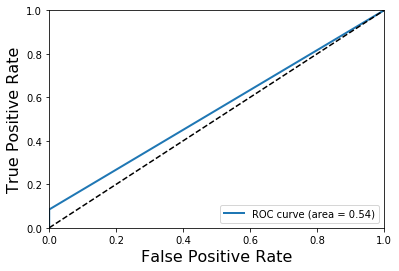

In [68]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest')
plt.legend(loc='lower right')
plt.show

- As we can see from the above observation that our AUC is around 0.54 which is almost random. 
- This is expected since the data is skewed and there are no features which could be a good predictor of injuries / fatalities 

##### Random Forest with UnScaled Values and feature importance

In [76]:
clf = RandomForestClassifier(random_state=123)

In [77]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [80]:
y_predict = clf.predict(X_test)

<function matplotlib.pyplot.show>

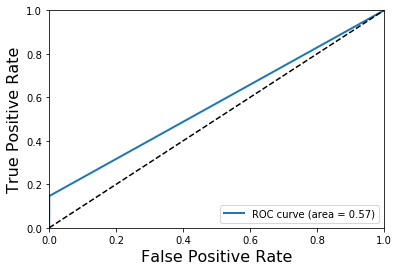

In [81]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest')
plt.legend(loc='lower right')
plt.show

- Random forest gives us the auc score slighly better than randomized grid search

In [83]:
importances = clf.feature_importances_

In [84]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [85]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 5 (0.191596)
2. feature 3 (0.155064)
3. feature 1 (0.137445)
4. feature 2 (0.130821)
5. feature 7 (0.112055)
6. feature 0 (0.088941)
7. feature 11 (0.046861)
8. feature 8 (0.045682)
9. feature 4 (0.038482)
10. feature 6 (0.032086)
11. feature 10 (0.014663)
12. feature 14 (0.002752)
13. feature 9 (0.001986)
14. feature 12 (0.001545)
15. feature 13 (0.000023)


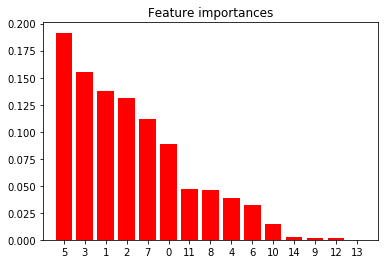

In [87]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### Training Random Forest with Scaled Values

##### Reading scaled csv and splitting data into train test set

In [250]:
df = pd.read_csv('./dataset/data/TFS_Final_Scaled.csv')

In [251]:
df.head(1)

,Unnamed: 0,incident_number,incident_date_time,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67,rescues_scaled,min_to_reach_scaled,ofm_investigations_contacted,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5
0,0,F11000010,2011-01-01 00:03:43,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.071434,0.118644,0,0.0,1.0,0,1,0,0,0,0


In [252]:
X = df.drop(['Unnamed: 0','incident_number','incident_date_time','total_inj_fatality'],axis=1)

In [253]:
Y = df[['total_inj_fatality']]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=123, stratify=Y)

In [255]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_train = y_train.ravel()
y_test = y_test.values
y_test = y_test.ravel()

In [256]:
X_train.shape

(576296, 82)

##### Random Forest for Scaled Values using Randomized Grid Search

In [257]:
def plot_roc_curve(fpr, tpr, auc, label=None):
    plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [258]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [259]:
rnd_clf = RandomForestClassifier()

In [113]:
param_dist = {"max_depth": [3, None],
              "n_estimators" : [3, 4, 6, 7, 10, 20, 50, 100,200],
              "max_features": sp_randint(2, 15),
              "min_samples_split": sp_randint(4, 25),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "min_samples_leaf": sp_randint(1, 20),
              "max_leaf_nodes": [None,2,20]}

In [114]:
n_iter_search = 50
random_search = RandomizedSearchCV(rnd_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=4, random_state=123, scoring='roc_auc')

In [115]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E008BE9B0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E008B44E0>, 'max_leaf_nodes': [None, 2, 20], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E00571B38>, 'n_estimators': [3, 4, 6, 7, 10, 20, 50, 10

In [116]:
print(random_search.best_score_)
print(random_search.best_params_)

0.982221681967
{'min_samples_leaf': 14, 'bootstrap': False, 'criterion': 'entropy', 'min_samples_split': 14, 'max_leaf_nodes': 20, 'max_features': 12, 'n_estimators': 200, 'max_depth': None}


In [117]:
y_pred = random_search.predict(X_test)

<function matplotlib.pyplot.show>

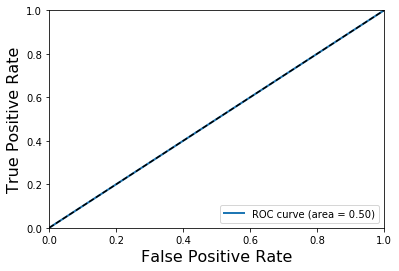

In [118]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest')
plt.legend(loc='lower right')
plt.show

- With scaled valies our classifier performs poorly. 
- auc value is 0.5 is random so our classifer is unable to predict injuries / fatalities

##### Random Forest Classifier with scaled values and feature importance

In [119]:
clf = RandomForestClassifier(random_state=123)

In [120]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [121]:
y_predict = clf.predict(X_test)

<function matplotlib.pyplot.show>

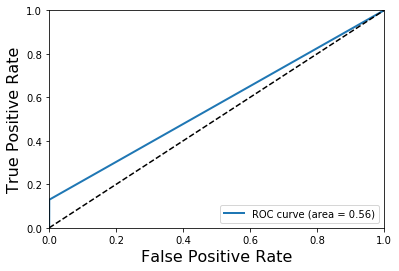

In [122]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest')
plt.legend(loc='lower right')
plt.show

In [123]:
importances = clf.feature_importances_

In [124]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [125]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.196196)
2. feature 1 (0.166861)
3. feature 2 (0.149041)
4. feature 72 (0.127231)
5. feature 74 (0.120678)
6. feature 71 (0.089578)
7. feature 83 (0.040353)
8. feature 73 (0.037833)
9. feature 3 (0.022289)
10. feature 82 (0.014985)
11. feature 77 (0.007221)
12. feature 79 (0.005609)
13. feature 76 (0.004243)
14. feature 78 (0.004126)
15. feature 86 (0.002884)
16. feature 4 (0.002370)
17. feature 75 (0.002270)
18. feature 84 (0.000830)
19. feature 80 (0.000817)
20. feature 30 (0.000804)
21. feature 58 (0.000405)
22. feature 42 (0.000324)
23. feature 50 (0.000316)
24. feature 81 (0.000286)
25. feature 52 (0.000258)
26. feature 41 (0.000255)
27. feature 53 (0.000231)
28. feature 15 (0.000156)
29. feature 57 (0.000148)
30. feature 9 (0.000135)
31. feature 29 (0.000129)
32. feature 59 (0.000120)
33. feature 36 (0.000112)
34. feature 60 (0.000103)
35. feature 17 (0.000091)
36. feature 10 (0.000088)
37. feature 28 (0.000084)
38. feature 63 (0.000079)
39. feature 19 (0.000073)
4

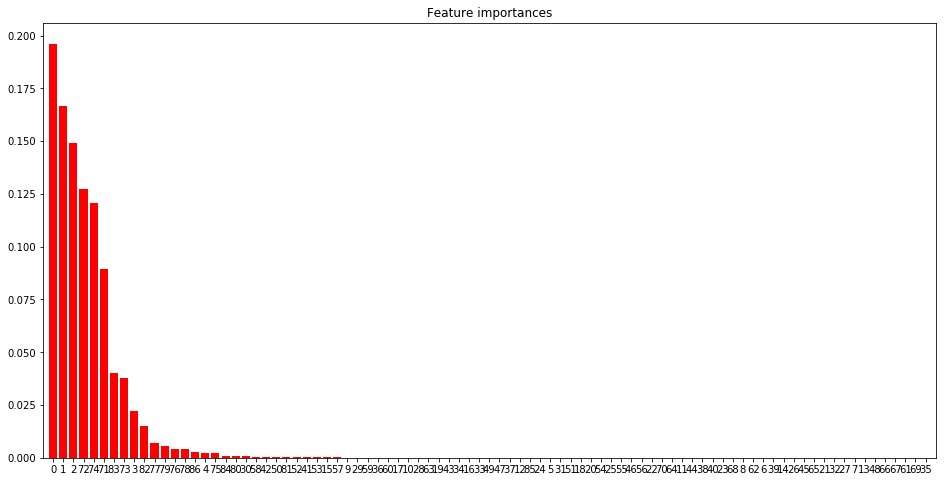

In [126]:
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

##### Cross Validation with Best Randomized Classifier

In [130]:
y_predict = cross_val_predict(random_search.best_estimator_, X_train, y_train, cv=5, method='predict')

In [132]:
y_predict.shape

(576296,)

<function matplotlib.pyplot.show>

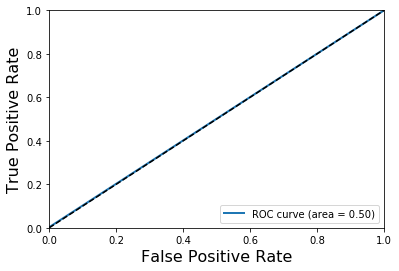

In [134]:
fpr, tpr, threshold = roc_curve(y_train, y_predict)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest')
plt.legend(loc='lower right')
plt.show

### Neural Net with Scaled Data

We decided to train the Neural Net with our scaled data.
- The result we got is very consistent to the other tradional models
- We used 1 hidden layers with 8 units
- The input layer has the same number of neurons as the number of features

#### Reading scaled csv and splitting data into train test set

In [3]:
df = pd.read_csv('./dataset/data/TFS_Final_Scaled.csv')

In [4]:
df.head(1)

,Unnamed: 0,incident_number,incident_date_time,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67,rescues_scaled,min_to_reach_scaled,ofm_investigations_contacted,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5
0,0,F11000010,2011-01-01 00:03:43,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.071434,0.118644,0,0.0,1.0,0,1,0,0,0,0


In [5]:
X = df.drop(['Unnamed: 0','incident_number','incident_date_time','total_inj_fatality'],axis=1)

In [6]:
Y = df[['total_inj_fatality']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=123, stratify=Y)

In [10]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_train = y_train.ravel()
y_test = y_test.values
y_test = y_test.ravel()

In [11]:
X_train.shape

(576296, 82)

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential

In [151]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

In [223]:
model = Sequential()
model.add(Dense(88,input_shape=(87,), kernel_initializer='normal',activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=5, batch_size=10)

Epoch 1/5
576296/576296 [==============================] - 48s - loss: 0.0051 - acc: 0.9987    
Epoch 2/5
576296/576296 [==============================] - 47s - loss: 0.0047 - acc: 0.9988    
Epoch 3/5
576296/576296 [==============================] - 47s - loss: 0.0047 - acc: 0.9988    
Epoch 4/5
576296/576296 [==============================] - 47s - loss: 0.0047 - acc: 0.9988    
Epoch 5/5
576296/576296 [==============================] - 47s - loss: 0.0046 - acc: 0.9988    


In [224]:
probabilities = model.predict(X_test)

In [225]:
y_pred = (probabilities >0.5)
y_test = (y_test > 0.5)

<function matplotlib.pyplot.show>

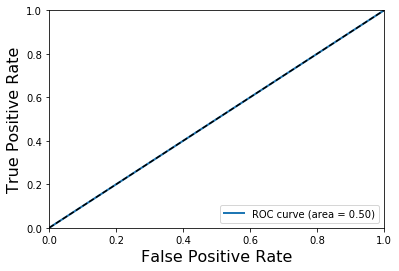

In [226]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.Figure(figsize=(8,8))
plot_roc_curve(fpr, tpr, roc_auc, 'Neural Net')
plt.legend(loc='lower right')
plt.show

- AUC score is same as random forest.

#### Confusion Matrix

In [194]:
from sklearn.metrics import confusion_matrix

In [209]:
confusion_matrix(y_test, y_pred, labels=[True, False])

array([[     0,    178],
       [     0, 143896]], dtype=int64)

In [222]:
np.where(y_test == True)

(array([    36,    380,   2666,   2906,   3312,   4393,   4435,   4631,
          4732,   5475,   6613,   7186,   7440,   9027,  10641,  10825,
         11110,  13145,  13284,  15080,  15791,  16611,  16832,  17748,
         18848,  19378,  19631,  20057,  21571,  21618,  21683,  23052,
         23787,  24871,  25309,  25576,  26500,  29234,  30640,  31004,
         33758,  33820,  35162,  35374,  36341,  36753,  36866,  38515,
         41108,  42461,  43074,  45532,  46132,  46163,  47406,  47934,
         49398,  49506,  50558,  51122,  51655,  52006,  53813,  53839,
         54104,  54118,  54786,  55239,  56702,  57549,  58798,  59178,
         59745,  60256,  61305,  61605,  63454,  63763,  63846,  64414,
         65832,  67164,  67332,  67949,  68993,  69760,  69889,  70029,
         70319,  70584,  70739,  71398,  71443,  71551,  71599,  72357,
         72491,  73825,  73858,  74905,  75348,  76779,  77017,  77558,
         78780,  79396,  80138,  82231,  82321,  82339,  82448, 

In [213]:
np.where(Y_pred == True)

(array([], dtype=int64),)

### Anomaly Detection on Scaled Values

Its important to split the data in to three sets. For the sake of explanation let's take an example of banana and orange. Let's say we have a skewed dataset where 95% examples are of banana and 5% orange.
- First set Train set aside which doesn't contain any outliters or any oranges. So when we train an oneClassSVM we tell the algorithm this is how the data looks like which only has banana.
- Then we set aside Test set which also doesn't contain any outliers. Now we predict on test set to make sure the algorithm doesn't predict any oranges
- Then we predict on Outliers set which has only oranges. And then we check how many bananas algorithm detected and that would be error

In [260]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
pd.set_option('display.max_columns',200)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import urllib.request
import seaborn as sns

In [261]:
from sklearn import svm

#### Splitting the data in to train test outliers

In [262]:
df = pd.read_csv('./dataset/data/TFS_Final_Scaled.csv')

In [263]:
df.head(1)

,Unnamed: 0,incident_number,incident_date_time,total_inj_fatality,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67,rescues_scaled,min_to_reach_scaled,ofm_investigations_contacted,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5
0,0,F11000010,2011-01-01 00:03:43,0.0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.071434,0.118644,0,0.0,1.0,0,1,0,0,0,0


In [264]:
df = df.drop(['Unnamed: 0','incident_number','incident_date_time'],axis=1)

In [265]:
X = df[(df['total_inj_fatality'] == 0)]

In [266]:
# training takes long for the whole dataset use only a fraction of it
X = X.sample(frac=0.3)

In [267]:
X.shape

(215844, 83)

In [268]:
X_outliers = df[(df['total_inj_fatality'] == 1)]

In [269]:
X.drop(labels=['total_inj_fatality'],axis=1,inplace=True)
X_outliers.drop(labels=['total_inj_fatality'],axis=1,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\mlbook\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [270]:
X.shape

(215844, 82)

In [271]:
X_outliers.shape

(891, 82)

In [272]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state=123)

In [273]:
print(X_train.shape)
print(X_test.shape)

(172675, 82)
(43169, 82)


In [274]:
len(X_train)

172675

In [275]:
X_train = X_train.values
X_test = X_test.values
X_outliers = X_outliers.values

#### Training an Anomaly Detection Algorithm (OneClassSVM)

Calculating the error for train, test , outlier prediction

In [276]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

#### Plotting scatter plot

In [283]:
def scatter_plot(x, y):
    error_train = float((n_error_train/len(X_train)) * 100)
    error_test = float((n_error_test/len(X_test)) * 100)
    error_outliers = float((n_error_outliers/len(X_outliers)) * 100)

    plt.title("Novelty Detection: " + str(X.columns[x]) + ' vs ' + str(X.columns[y]))
    s1 = 80
    s2 = 40
    s3=20
    b1 = plt.scatter(X_train[:, x], X_train[:, y], c='white', s=s1, edgecolors='k')
    b2 = plt.scatter(X_test[:, x], X_test[:, y], c='blueviolet', s=s2,
                     edgecolors='k')
    c = plt.scatter(X_outliers[:, x], X_outliers[:, y], c='gold', s=s3,
                    edgecolors='k')
    plt.axis('tight')

    plt.legend([b1, b2, c],
               ["training observations",
                "new regular observations", "new abnormal observations"],
               loc="upper right",
               prop=matplotlib.font_manager.FontProperties(size=11))
    plt.xlabel(
        "error train: %0.2f ; errors novel regular: %0.2f ; "
        "errors novel abnormal: %0.2f"
        % (error_train,error_test, error_outliers))
    plt.rcParams["figure.figsize"] = [8,8]
    plt.show()


#### Scatter plotting between total num personnel and smoke alarm impact on num evac

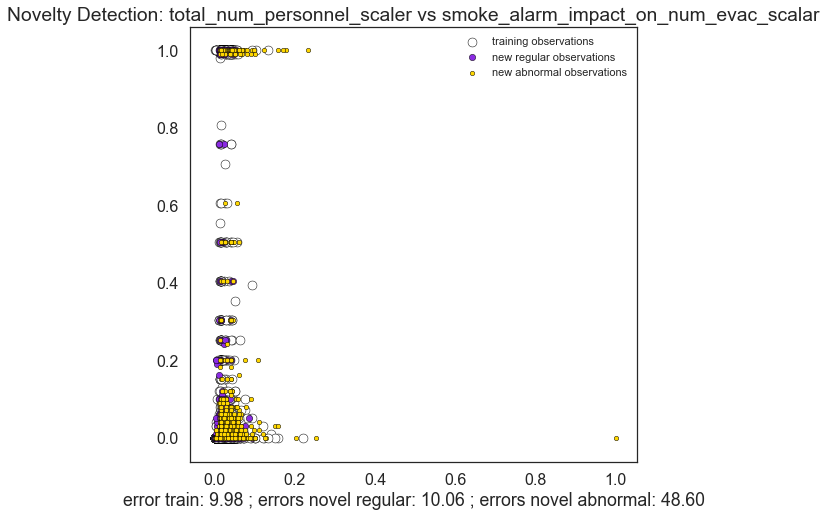

In [284]:
scatter_plot(0,1)

#### Scatter plotting between property and responding units

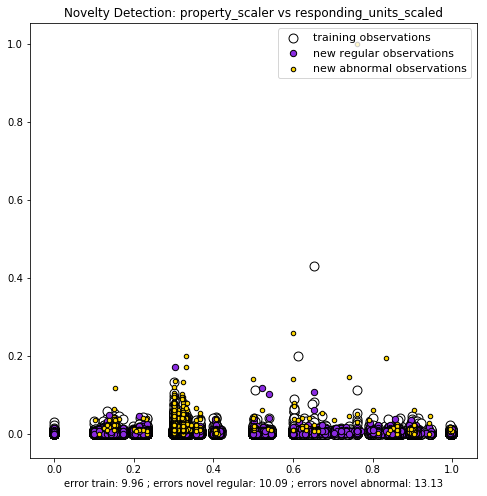

In [99]:
scatter_plot(2,74)

#### Scatter plotting between rescures and ofm contacted

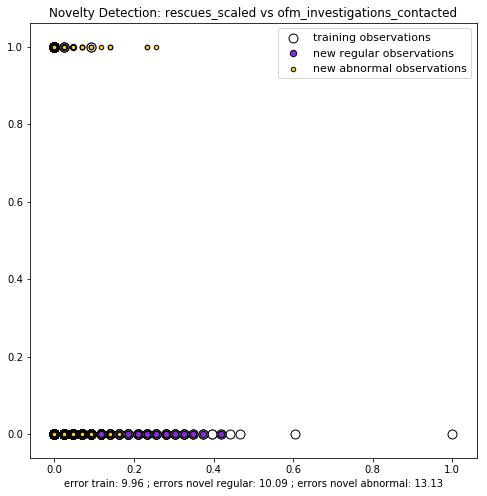

In [100]:
scatter_plot(71,73)

### DBSCAN and KMEANS on Scaled data

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import os
from IPython.display import display
pd.set_option('display.max_columns',200)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#### Load the scaled file for modeling

In [12]:
#Drop the columns not needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

In [13]:
df_analysis = pd.read_csv('./dataset/data/TFS_Final_Scaled.csv', low_memory=False)
df_analysis = df_analysis.dropna()
df_analysis = df_analysis.drop("incident_number",axis=1)
df_analysis = df_analysis.drop("incident_date_time",axis=1)
df_analysis = df_analysis.drop("Unnamed: 0",axis=1)
print(df_analysis.shape)
#df_analysis = df_analysis.head(100000)
print("file loaded...")

(720370, 83)
file loaded...


#### Split the data in train and test sets

In [14]:
#Split to train and test set
#stratify = y
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_analysis, df_analysis["total_inj_fatality"]):
    start_train_set = df_analysis.loc[train_index]
    start_test_set = df_analysis.loc[test_index]

X_train_set = start_train_set.drop("total_inj_fatality", axis = 1)
y_train_set = start_train_set["total_inj_fatality"].copy()
X_test_set = start_test_set.drop("total_inj_fatality", axis = 1)
y_test_set = start_test_set["total_inj_fatality"].copy()
X_train_set_sc = StandardScaler().fit_transform(X_train_set)
X_test_set_sc = StandardScaler().fit_transform(X_test_set)

X_train_set_inj = start_train_set
X_test_set_inj = start_test_set
X_train_set_sc = StandardScaler().fit_transform(X_train_set)
X_test_set_sc = StandardScaler().fit_transform(X_test_set)
X_train_set_inj_sc = StandardScaler().fit_transform(X_train_set_inj)
X_test_set_inj_sc = StandardScaler().fit_transform(X_test_set_inj)

print("done")

done


#### DBSCAN

start
start_test_set shape: (144074, 88)


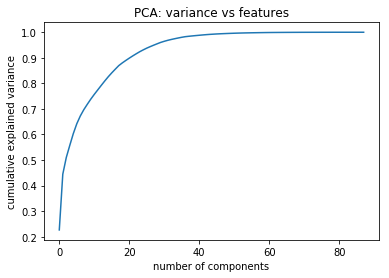

PCA explained variance ration:  [0.22701159 0.21772559 0.06594063 0.04750739 0.04589257 0.03903732
 0.0307277  0.02470983 0.02110208 0.01972052 0.01844721 0.01797333
 0.01789213]
pca 2d shape:  (144074, 13)
[ 0  1  1 ...  0 43  0]
Counter({1: 51723, 0: 22749, 7: 9634, 2: 6438, 14: 6263, 9: 4851, 8: 4752, 11: 4157, 12: 4141, 3: 2856, 24: 2822, 5: 2655, 17: 2392, 4: 2242, 29: 2054, 22: 1224, 13: 1140, -1: 1090, 23: 1054, 39: 877, 35: 695, 25: 628, 18: 587, 19: 585, 21: 546, 33: 516, 27: 512, 30: 428, 41: 392, 45: 357, 6: 326, 31: 293, 16: 259, 43: 242, 40: 218, 37: 198, 26: 197, 20: 193, 38: 183, 28: 160, 42: 131, 15: 129, 34: 123, 44: 111, 32: 109, 36: 107, 52: 105, 10: 102, 46: 98, 50: 88, 51: 75, 48: 72, 47: 68, 53: 64, 49: 63})
Outlier with injury:  23
Estimated number of clusters: 54
Estimated number of noise points: 1090


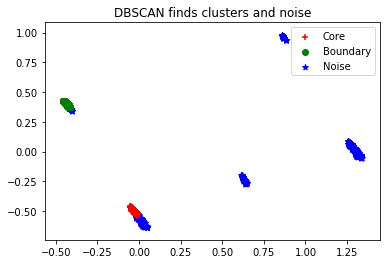

done


In [8]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

#Compute DBSCAN
print("start")
print("start_test_set shape:", start_test_set.shape)

#Explained variance
pca = PCA().fit(start_train_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA: variance vs features")
plt.show()

#First 13 explain about 80% of the variance, we reduce the dimension to cluster and improve performance
pca = PCA(n_components=13).fit(start_test_set)
print("PCA explained variance ration: ",pca.explained_variance_ratio_) 

pca_2d = pca.transform(start_test_set)
print("pca 2d shape: ", pca_2d.shape)

db = DBSCAN(eps=.2, min_samples=60, n_jobs=-1, algorithm='auto').fit(pca_2d)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True

print(db.labels_)
from collections import Counter
labels = db.labels_
print(Counter(db.labels_))
print("Outlier with injury: ", start_test_set[db.labels_==-1].total_inj_fatality.sum())

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

#pca = PCA(n_components=2).fit(start_test_set)
#pca_2d = pca.transform(start_test_set)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')

plt.legend([c1, c2, c3], ['Core', 'Boundary','Noise'])
plt.title('DBSCAN finds clusters and noise')
plt.show()         
  
print("done")


#### KMeans

start


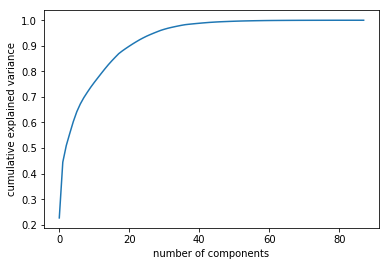

PCA explained variance ration:  [0.04 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Normalized confusion matrix
[[0.73 0.27]
 [0.03 0.97]]


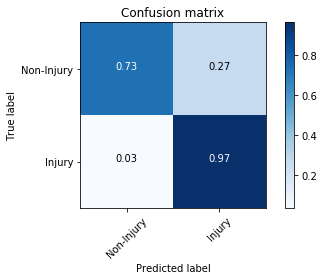

             precision    recall  f1-score   support

          0       1.00      0.73      0.85    215844
          1       0.00      0.97      0.01       267

avg / total       1.00      0.73      0.85    216111

done


In [133]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


print("start")


#Explained variance
pca = PCA().fit(start_train_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA: variance vs features")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#First 13 explain about 80% of the variance, we reduce the dimension to cluster and improve performance
pca = PCA(n_components=13).fit(X_train_set_sc)
print("PCA explained variation: ",pca.explained_variance_ratio_) 

X_train_set_sc_pca = pca.transform(X_train_set_sc)
X_test_set_sc_pca = pca.transform(X_test_set_sc)

kmeans = KMeans(n_clusters=2,random_state=123,n_jobs=-1,precompute_distances=True,max_iter=1000,init='k-means++')
kmeans = kmeans.fit(X_train_set_sc_pca)
y_train_set_pred = kmeans.predict(X_train_set_sc_pca)
   
#Test Set
y_test_set_pred = kmeans.predict(X_test_set_sc_pca)
class_names = {'Non-Injury','Injury'}

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_set, y_test_set_pred)
np.set_printoptions(precision=2)
y_test_set_np = np.array(y_test_set)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix')

plt.show()
print(classification_report(y_test_set,y_test_set_pred))
print("done")

### KNN and SVC on Unscaled data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


#### Reading unscaled csv and splitting data into train test set

In [3]:
_df = pd.read_csv('./dataset/data/TFS_Final_Unscaled.csv')

In [4]:
_df.drop(['Unnamed: 0','incident_number','incident_date_time'], axis=1, inplace=True)

In [5]:
_df.head()

,rescues_unscaled,min_to_reach_unscaled,smoke_alarm_impact_on_num_evac,property,response_type,total_num_personnel,event_alarm_level,responding_units,ofm_investigations_contacted,aid_to_from_other_depts,contacted,bld_heigh_small,bld_heigh_med,bld_heigh_high,bld_heigh_no_val,total_inj_fatality
0,0,7,0,301.0,89,4,0.006157,1.0,0,4,0,0,0,0,0,0
1,0,6,0,301.0,38,4,0.006157,1.0,0,4,0,0,0,0,0,0
2,0,4,0,302.0,89,4,0.006157,1.0,0,4,0,0,0,0,0,0
3,0,6,0,861.0,3,4,0.006157,1.0,0,4,0,0,0,0,0,0
4,0,5,0,323.0,33,14,0.006157,4.0,0,1,0,0,0,0,0,0


In [6]:
# debug size
#_df = _df.iloc[0:200000,:]

In [7]:
_df.shape

(200000, 16)

In [8]:
X = _df.iloc[:,0:15] 
Y = _df.iloc[:,15]

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
x_t, x_v, y_t, y_v = train_test_split(X, Y, test_size=validation_size, \
                                                      random_state=seed)

print('Testing Size - ', len(x_t))
print('Training Size - ', len(x_v))

Testing Size -  134000
Training Size -  66000


#### KNN

In [9]:
knn_ = KNeighborsClassifier(n_neighbors= 3,\
                          weights='distance',\
                          metric='euclidean',\
                          algorithm='kd_tree')

scores = cross_val_score(knn_, x_t, y_t, cv=2, scoring='accuracy')
print('Mean',scores.mean())
print('STD',scores.std())

knn_.fit(x_t,y_t)
knn_p = knn_.predict(x_v)
print(knn_p)

Mean 0.9989701474713678
STD 0.0001194183560079276
[0 0 0 ... 0 0 0]


#### SVC

In [10]:
svc_ = SVC(kernel='rbf')

scores = cross_val_score(svc_, x_t, y_t, cv=5, scoring='accuracy')
print('Mean',scores.mean())
print('STD',scores.std())

svc_.fit(x_t,y_t)
svc_p = svc_.predict(x_v)
print(svc_p)

Mean 0.9991567172528182
STD 5.0600609897574254e-05
[0 0 0 ... 0 0 0]


### KNN and SVC on Scaled Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


#### Reading scaled csv and splitting data into train test set

In [3]:
#### Reading scaled csv and splitting data into train test set_df = pd.read_csv('TFS_Final_Scaled.csv')

In [4]:
_df.drop(['Unnamed: 0','incident_number','incident_date_time'], axis=1, inplace=True)

In [5]:
_df.head()

,total_num_personnel_scaler,smoke_alarm_impact_on_num_evac_scalar,property_scaler,response_type0,response_type1,response_type2,response_type3,response_type4,response_type5,response_type6,response_type7,response_type8,response_type9,response_type10,response_type11,response_type12,response_type13,response_type14,response_type15,response_type16,response_type17,response_type18,response_type19,response_type20,response_type21,response_type22,response_type23,response_type24,response_type25,response_type26,response_type27,response_type28,response_type29,response_type30,response_type31,response_type32,response_type33,response_type34,response_type35,response_type36,response_type37,response_type38,response_type39,response_type40,response_type41,response_type42,response_type43,response_type44,response_type45,response_type46,response_type47,response_type48,response_type49,response_type50,response_type51,response_type52,response_type53,response_type54,response_type55,response_type56,response_type57,response_type58,response_type59,response_type60,response_type61,response_type62,response_type63,response_type64,response_type65,response_type66,response_type67,rescues_scaled,min_to_reach_scaled,ofm_investigations_contacted,responding_units_scaled,aid_to_from_other_depts_scaled,event_alarm_level_scaled_0,event_alarm_level_scaled_1,event_alarm_level_scaled_2,event_alarm_level_scaled_3,event_alarm_level_scaled_4,event_alarm_level_scaled_5,contacted,bld_heigh_small,bld_heigh_med,bld_heigh_high,bld_heigh_no_val,total_inj_fatality
0,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118644,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0.003132,0.0,0.301301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101695,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0.003132,0.0,0.302302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0.003132,0.0,0.861862,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101695,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0.010963,0.0,0.323323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084746,0,0.006637,0,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# debug size
#_df = _df.iloc[0:50000,:]

In [7]:
_df.shape

(720370, 88)

In [8]:
X = _df.iloc[:,0:87] 
Y = _df.iloc[:,87]

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
x_t, x_v, y_t, y_v = train_test_split(X, Y, test_size=validation_size, \
                                                      random_state=seed)

print('Testing Size - ', len(x_t))
print('Training Size - ', len(x_v))

Testing Size -  482647
Training Size -  237723


#### KNN

In [9]:
knn_ = KNeighborsClassifier(n_neighbors= 3,\
                          weights='distance',\
                          metric='euclidean',\
                          algorithm='kd_tree')

scores = cross_val_score(knn_, x_t, y_t, cv=2, scoring='accuracy')
print('Mean',scores.mean())
print('STD',scores.std())

knn_.fit(x_t,y_t)
knn_p = knn_.predict(x_v)
print(knn_p)

Mean 0.9984916513254847
STD 3.729121211015762e-05
[0 0 0 ... 0 0 0]


#### SVC

In [10]:
svc_ = SVC(kernel='rbf')

scores = cross_val_score(svc_, x_t, y_t, cv=5, scoring='accuracy')
print('Mean',scores.mean())
print('STD',scores.std())

svc_.fit(x_t,y_t)
svc_p = svc_.predict(x_v)
print(svc_p)

Mean 0.9987796464382107
STD 4.135013539885878e-06
[0 0 0 ... 0 0 0]


## CONCLUSION

#### Conclusion

Even though our accuracy metric ('AUC') is random. It does make sense why it's that bad.
- After looking at all the plots while exploring the data. It comes as no surprise that there is not a single feature which we could have used that would have been a good predictor for injuries/fatalities 
- For any feature we had injuries/fatalities we also had no injuries. For that reason the classifer couldn't draw a decision boundary to separate injuries with no injuries.
- The data we have is skewed. The data we have from 2011 - 2016, only 0.12 reflect injuries/fatalities. That means that 99.88 % data has no injuries 

#### Future Features which could be a good predictor for injuries

After analyzing the dataset. There are couple of features which comes to mind which could be a good predictor for injuries / fatalities
- Having the subscript of the 911 call could be a good features for predicting injuries / fatalities. 
- If we have a features where we know that a specific ambulance on scene was also arrived at one of the hospital or it made a call to the hospital that could also be a good predictor of injuries / fatalities

### References 
[1]: Fire Services, Open Data Catalog for Fire Incidents by City of Toronto, Feb 10, 2020, https://open.toronto.ca/dataset/fire-incidents/